Il est souvent nécessaire d'utiliser des techniques de visualisation à toutes les étapes d'une étude statistique. Un des avantages de **R** est qu'il est relativement simple de mettre en oeuvre tout les types de graphes généralement utilisés. Dans cette fiche, nous présentons tout d'abord les fonctions classiques qui permettent de tracer des figures. Nous proposons ensuite une introduction aux graphes  **ggplot** qui sont de plus en plus utilisés pour faire de la visualisation.

# 1. Fonctions graphiques conventionnelles

Pour commencer il est intéressant d'examiner quelques exemples de représentations graphiques construits avec **R**. On peut les obtenir à l'aide de la fonction **demo**.



	demo(graphics)
	---- ~~~~~~~~

> #  Copyright (C) 1997-2009 The R Core Team
> 
> require(datasets)

> require(grDevices); require(graphics)

> ## Here is some code which illustrates some of the differences between
> ## R and S graphics capabilities.  Note that colors are generally specified
> ## by a character string name (taken from the X11 rgb.txt file) and that line
> ## textures are given similarly.  The parameter "bg" sets the background
> ## parameter for the plot and there is also an "fg" parameter which sets
> ## the foreground color.
> 
> 
> x <- stats::rnorm(50)

> opar <- par(bg = "white")

> plot(x, ann = FALSE, type = "n")

> abline(h = 0, col = gray(.90))

> lines(x, col = "green4", lty = "dotted")

> points(x, bg = "limegreen", pch = 21)

> title(main = "Simple Use of Color In a Plot",
+       xlab = "Just a Whisper of a Label",
+       col.main = "blue", col.lab = gray(.8),
+       cex.main = 1.2, cex.lab = 1.0, font.main = 4, font.lab = 3)

> ## A little color wheel

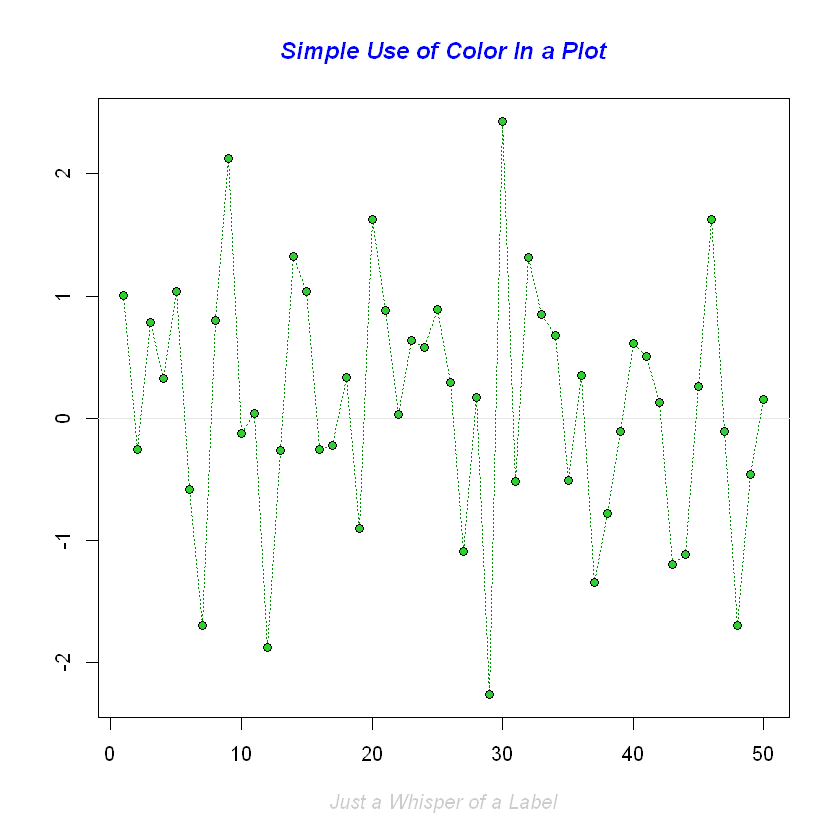


> title(main = "A Sample Color Wheel", cex.main = 1.4, font.main = 3)

> title(xlab = "(Use this as a test of monitor linearity)",
+       cex.lab = 0.8, font.lab = 3)

> ## We have already confessed to having these.  This is just showing off X11
> ## color names (and the example (from the postscript manual) is pretty "cute".
> 
> pie.sales <- c(0.12, 0.3, 0.26, 0.16, 0.04, 0.12)

> names(pie.sales) <- c("Blueberry", "Cherry",
+ 		      "Apple", "Boston Cream", "Other", "Vanilla Cream")

> pie(pie.sales,
+     col = c("purple","violetred1","green3","cornsilk","cyan","white"))


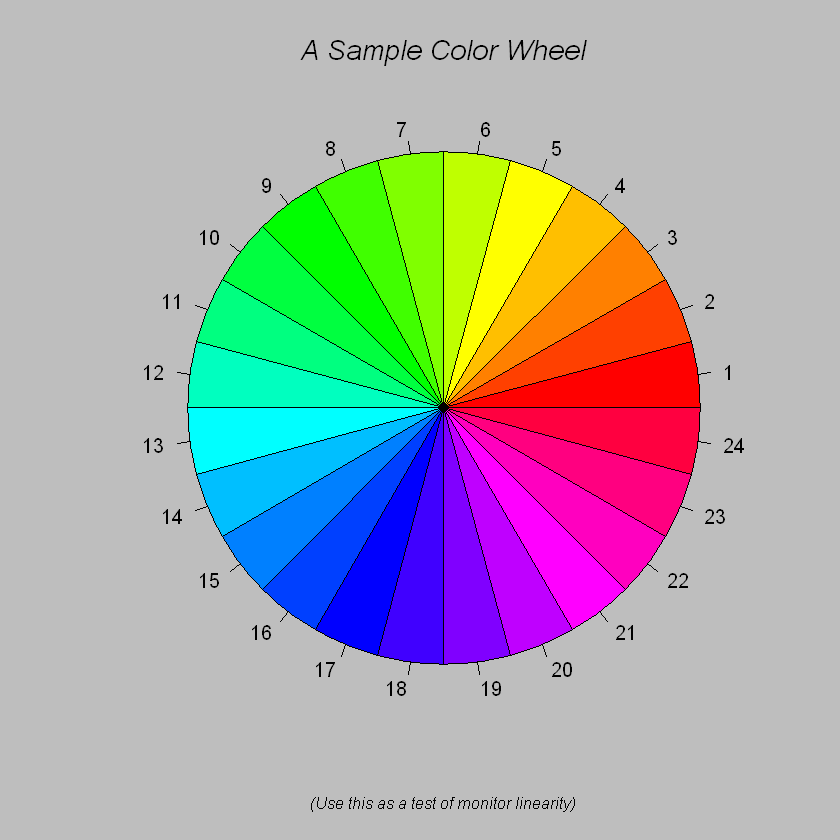


> title(main = "January Pie Sales", cex.main = 1.8, font.main = 1)

> title(xlab = "(Don't try this at home kids)", cex.lab = 0.8, font.lab = 3)

> ## Boxplots:  I couldn't resist the capability for filling the "box".
> ## The use of color seems like a useful addition, it focuses attention
> ## on the central bulk of the data.
> 
> par(bg="cornsilk")

> n <- 10

> g <- gl(n, 100, n*100)

> x <- rnorm(n*100) + sqrt(as.numeric(g))

> boxplot(split(x,g), col="lavender", notch=TRUE)


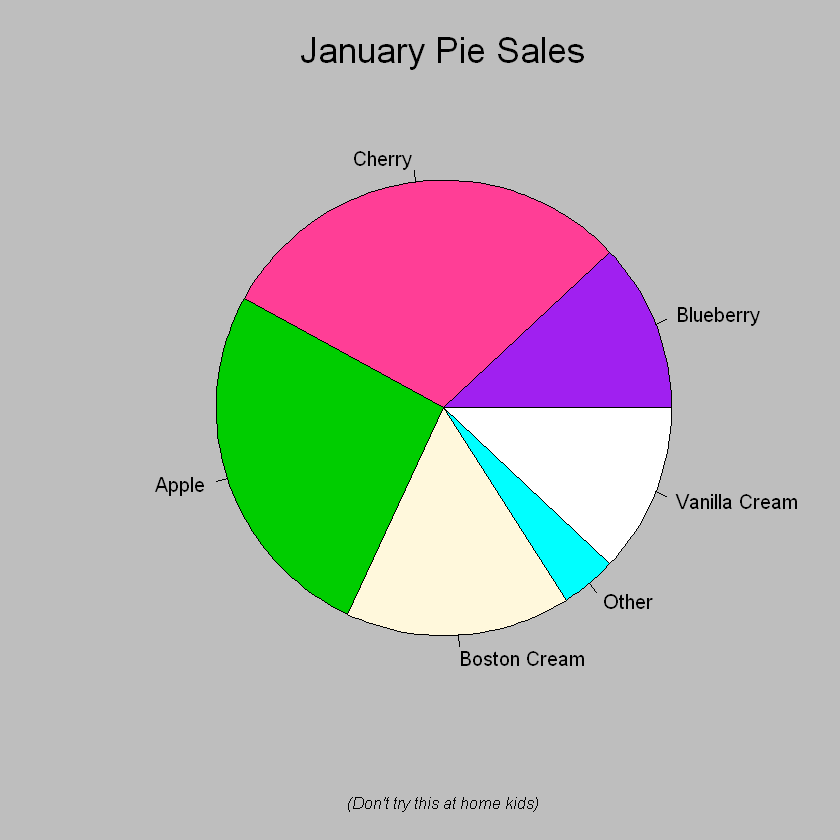


> title(main="Notched Boxplots", xlab="Group", font.main=4, font.lab=1)

> ## An example showing how to fill between curves.
> 
> par(bg="white")

> n <- 100

> x <- c(0,cumsum(rnorm(n)))

> y <- c(0,cumsum(rnorm(n)))

> xx <- c(0:n, n:0)

> yy <- c(x, rev(y))

> plot(xx, yy, type="n", xlab="Time", ylab="Distance")


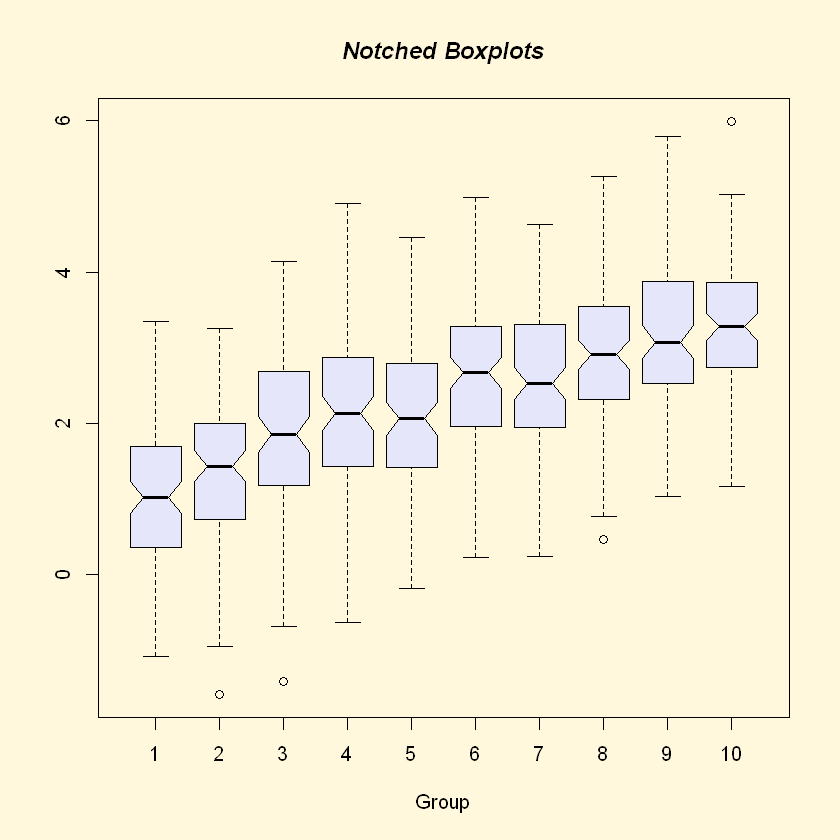


> polygon(xx, yy, col="gray")

> title("Distance Between Brownian Motions")

> ## Colored plot margins, axis labels and titles.	 You do need to be
> ## careful with these kinds of effects.	It's easy to go completely
> ## over the top and you can end up with your lunch all over the keyboard.
> ## On the other hand, my market research clients love it.
> 
> x <- c(0.00, 0.40, 0.86, 0.85, 0.69, 0.48, 0.54, 1.09, 1.11, 1.73, 2.05, 2.02)

> par(bg="lightgray")

> plot(x, type="n", axes=FALSE, ann=FALSE)


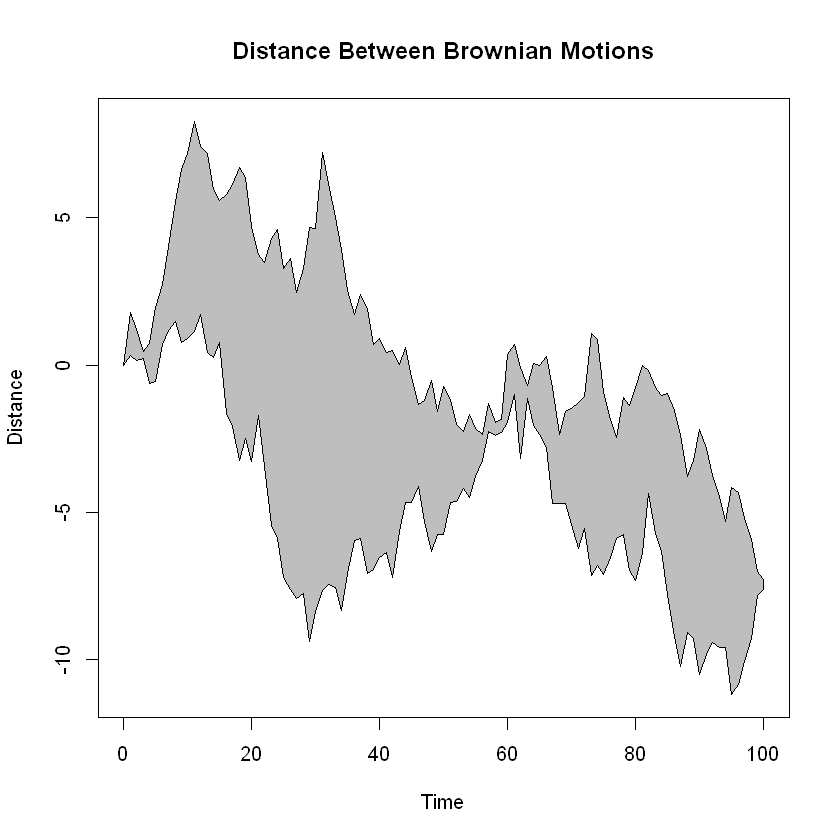


> usr <- par("usr")

> rect(usr[1], usr[3], usr[2], usr[4], col="cornsilk", border="black")

> lines(x, col="blue")

> points(x, pch=21, bg="lightcyan", cex=1.25)

> axis(2, col.axis="blue", las=1)

> axis(1, at=1:12, lab=month.abb, col.axis="blue")

> box()

> title(main= "The Level of Interest in R", font.main=4, col.main="red")

> title(xlab= "1996", col.lab="red")

> ## A filled histogram, showing how to change the font used for the
> ## main title without changing the other annotation.
> 
> par(bg="cornsilk")

> x <- rnorm(1000)

> hist(x, xlim=range(-4, 4, x), col="lavender", main="")


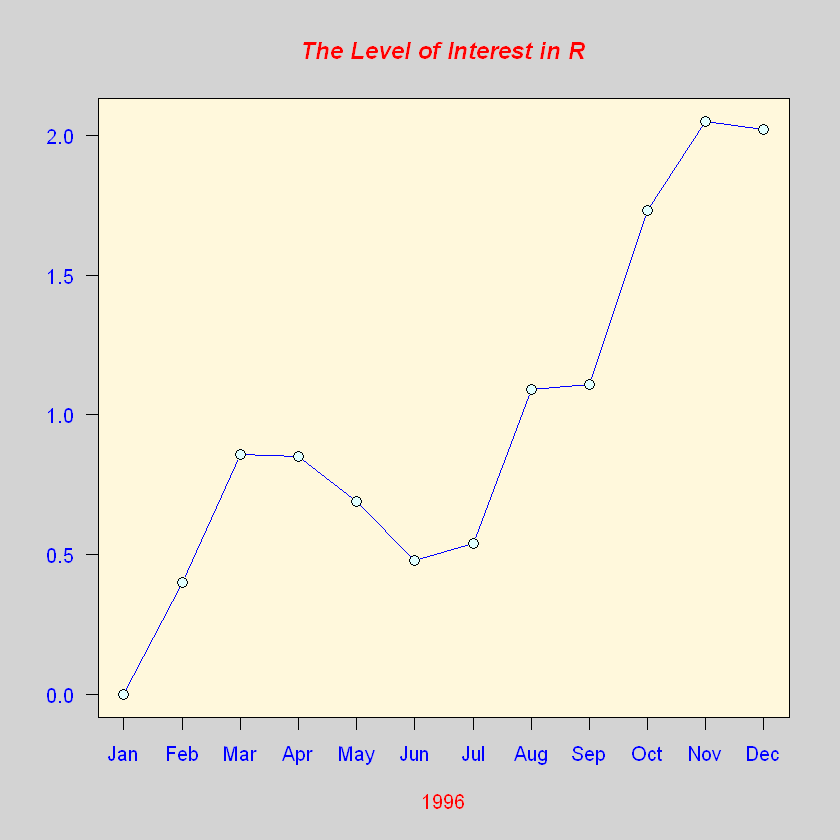


> title(main="1000 Normal Random Variates", font.main=3)

> ## A scatterplot matrix
> ## The good old Iris data (yet again)
> 
> pairs(iris[1:4], main="Edgar Anderson's Iris Data", font.main=4, pch=19)


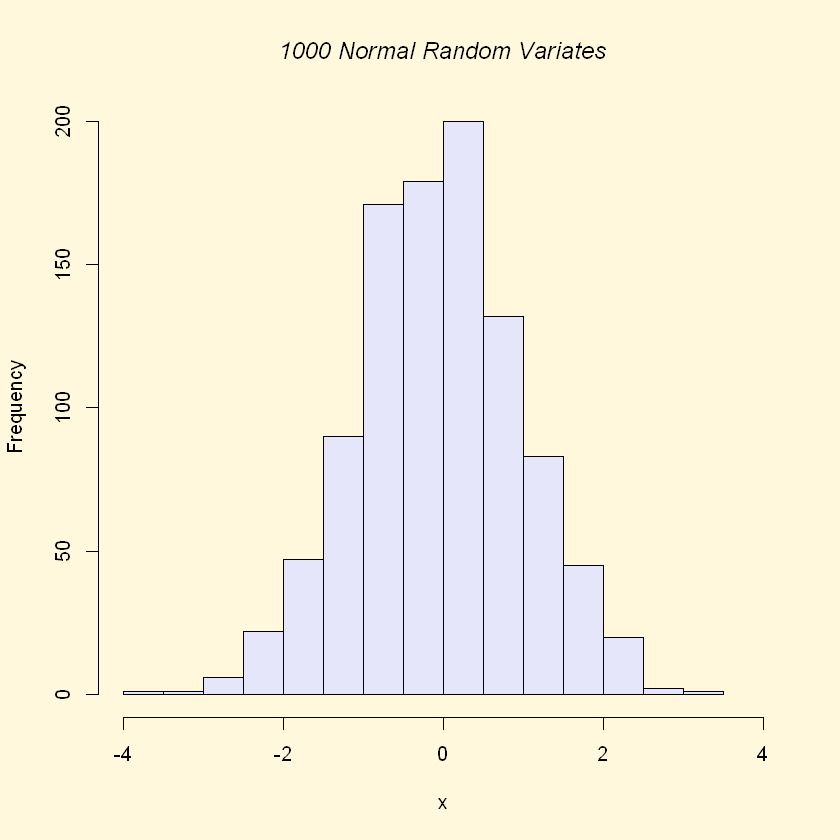


> pairs(iris[1:4], main="Edgar Anderson's Iris Data", pch=21,
+       bg = c("red", "green3", "blue")[unclass(iris$Species)])


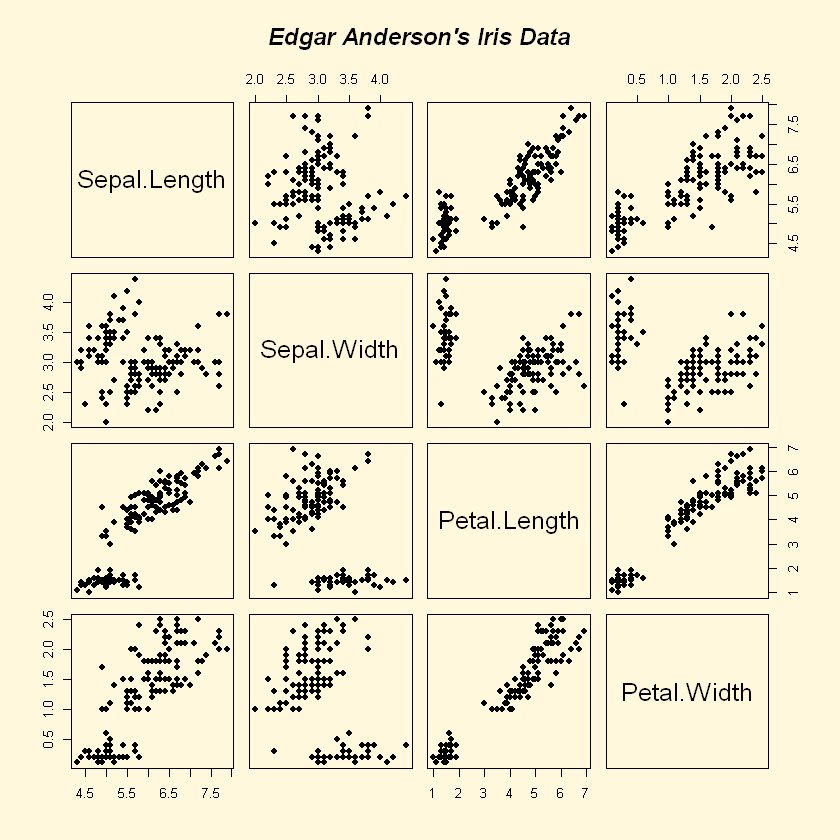


> ## Contour plotting
> ## This produces a topographic map of one of Auckland's many volcanic "peaks".
> 
> x <- 10*1:nrow(volcano)

> y <- 10*1:ncol(volcano)

> lev <- pretty(range(volcano), 10)

> par(bg = "lightcyan")

> pin <- par("pin")

> xdelta <- diff(range(x))

> ydelta <- diff(range(y))

> xscale <- pin[1]/xdelta

> yscale <- pin[2]/ydelta

> scale <- min(xscale, yscale)

> xadd <- 0.5*(pin[1]/scale - xdelta)

> yadd <- 0.5*(pin[2]/scale - ydelta)

> plot(numeric(0), numeric(0),
+      xlim = range(x)+c(-1,1)*xadd, ylim = range(y)+c(-1,1)*yadd,
+      type = "n", ann = FALSE)


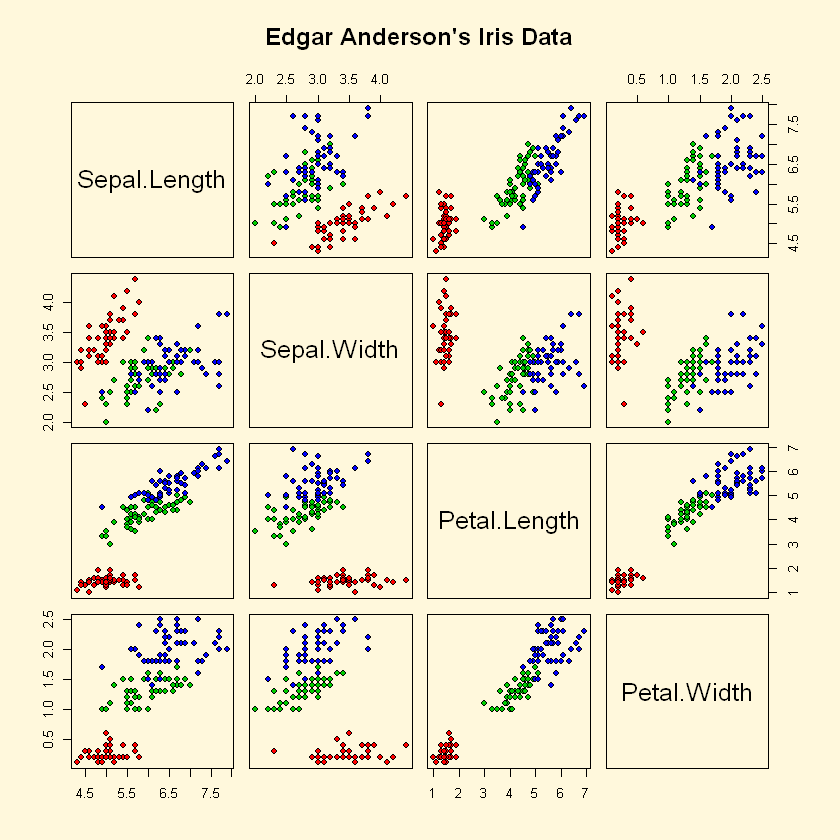


> usr <- par("usr")

> rect(usr[1], usr[3], usr[2], usr[4], col="green3")

> contour(x, y, volcano, levels = lev, col="yellow", lty="solid", add=TRUE)

> box()

> title("A Topographic Map of Maunga Whau", font= 4)

> title(xlab = "Meters North", ylab = "Meters West", font= 3)

> mtext("10 Meter Contour Spacing", side=3, line=0.35, outer=FALSE,
+       at = mean(par("usr")[1:2]), cex=0.7, font=3)

> ## Conditioning plots
> 
> par(bg="cornsilk")

> coplot(lat ~ long | depth, data = quakes, pch = 21, bg = "green3")


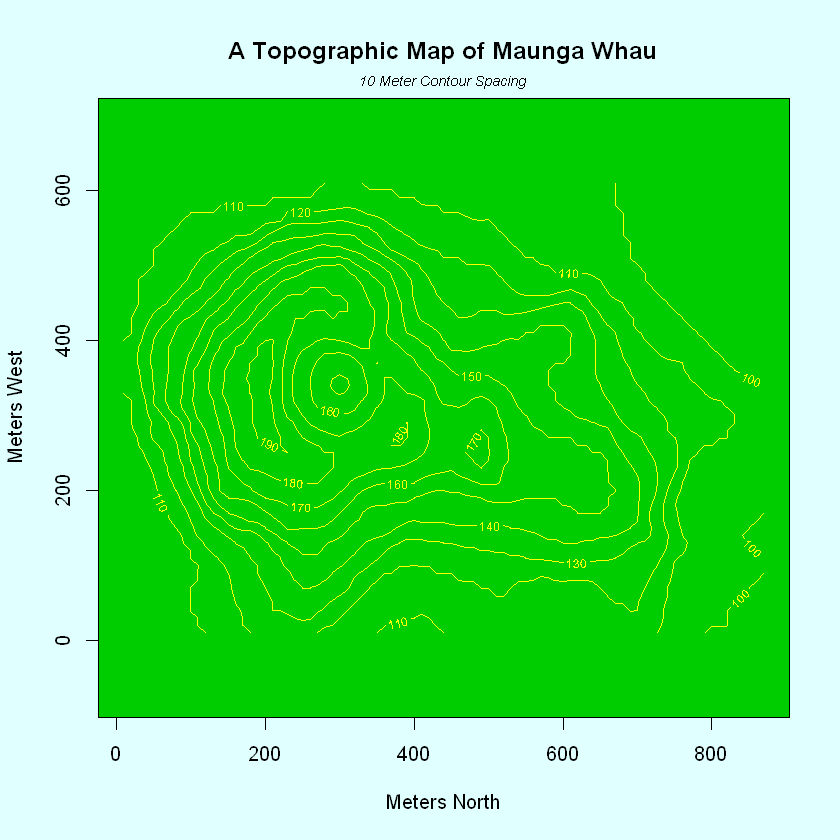


> par(opar)


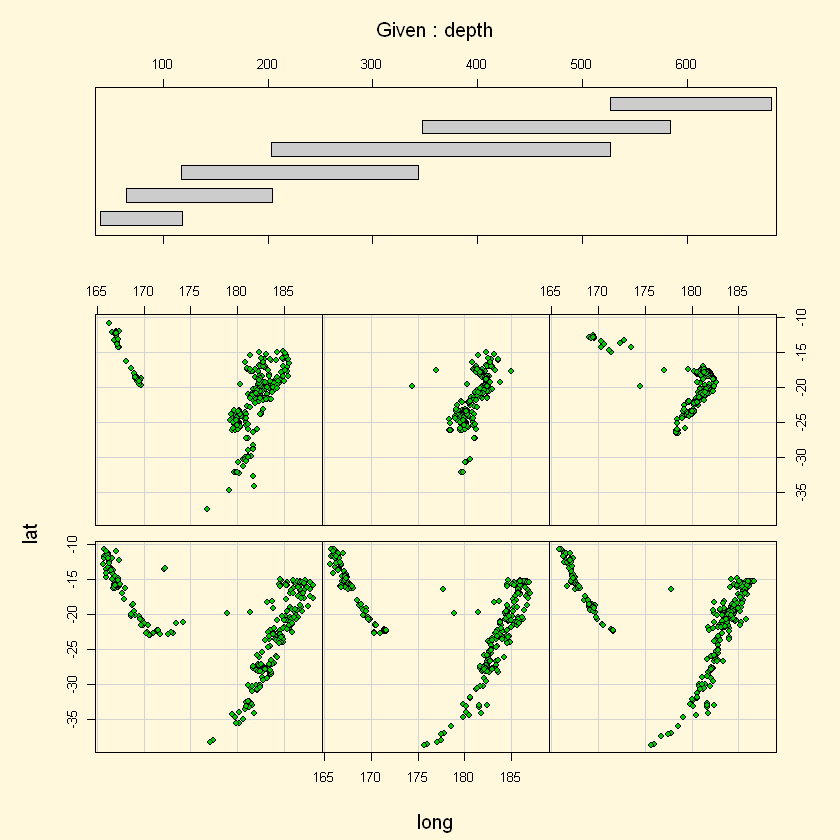

In [2]:
demo(graphics)

## La fonction **plot**

C'est une **fonction générique** que l'on peut utiliser pour représenter différents types de données. L'utilisation standard consiste à visualiser une variable *y* en fonction d'une variable *x*. On peut par exemple obtenir le graphe de la fonction $x\mapsto \sin(2\pi x)$ sur $[0,1]$, à l'aide de

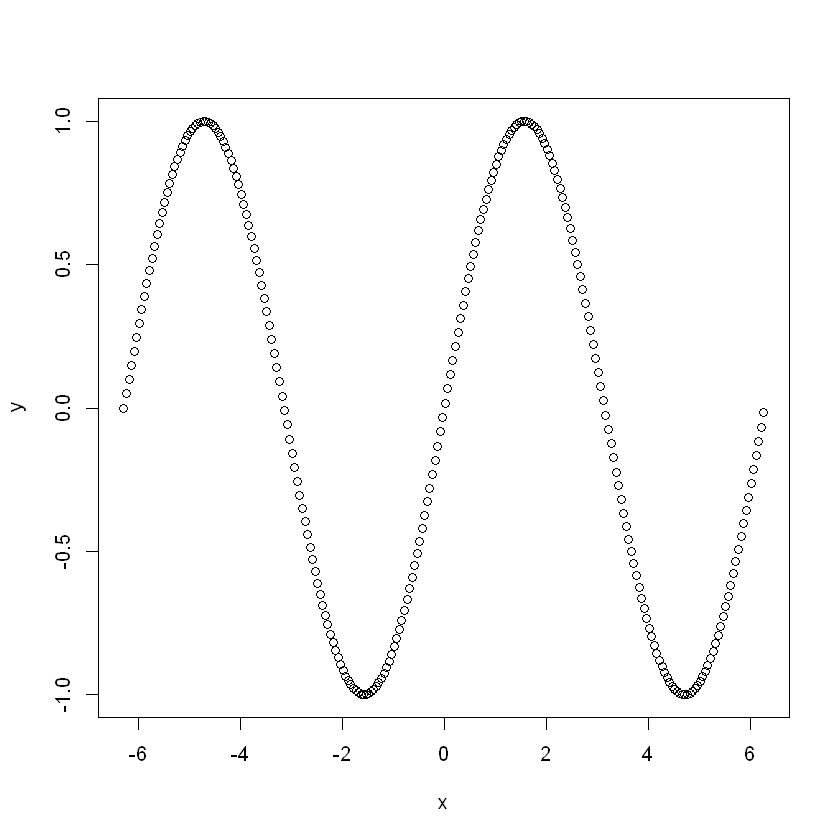

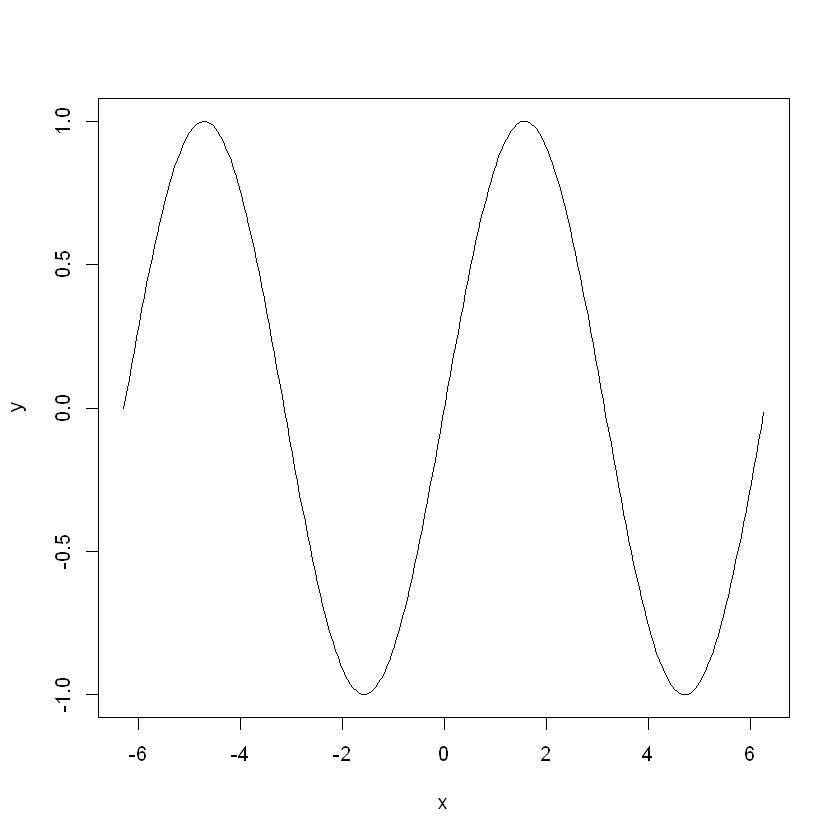

In [1]:
x <- seq(-2*pi,2*pi,by=0.05)
y <- sin(x)
plot(x,y) #points (par défaut)
plot(x,y,type="l") #représentation sous forme de ligne

Nous proposons des exemples de représentations de variables quantitatives et qualitatives à l'aide du jeu de données **ozone.txt** que l'on importe avec

In [ ]:
ozone <- read.table("ozone.txt")
summary(ozone)

On visualise tout d'abord 2 variables quantitatives à l'aide d'un nuage de points : la concentration en ozone maximale **maxO3** en fonction de la température à 12h **T12**.

In [ ]:
plot(ozone[,"T12"],ozone[,"maxO3"])

Comme les deux variables appartiennent au même jeu de données, on peut obtenir la même représentation à l'aide d'une sytaxe plus claire qui ajoutent automatiquement les noms des variables sur les axes :

In [ ]:
plot(maxO3~T12,data=ozone)

Une autre façon de faire (moins naturelle) :

In [ ]:
plot(ozone[,"T12"],ozone[,"maxO3"],xlab="T12",ylab="maxO3")

Il existe des fonctions spécifiques pour chaque type de graphs, par exemple **histogram**, **barplot** et **boxplot** :

In [ ]:
hist(ozone$maxO3,main="Histogram")
barplot(table(ozone$vent)/nrow(ozone),col="blue")
boxplot(maxO3~vent,data=ozone)

## Graphes interactifs avec rAmCharts

On peut utiliser ce package pour obtenir des graphes dynamiques. L'utilisation est relativement simple, il suffit d'ajouter le prefixe **am** devant le nom de la fonction :

In [ ]:
library(rAmCharts)
amHist(ozone$maxO3)
amPlot(ozone,col=c("T9","T12"))
amBoxplot(maxO3~vent,data=ozone)

### Exercice 1

* Tracer la fonction **sinus** entre $0$ et $2\pi$.
* A l'aide de la fonction **title** ajouter le titre  **Représentation de la fonction sinus**.

### Exercice 2

* Tracer la densité de la loi normale centrée réduite entre $-4$ et 4 (utiliser **dnorm**).
* Ajouter une ligne verticale (en tirets) qui passe par $x=0$ (utiliser **abline** avec **lty=2**).
* Sur le même graphe, ajouter les densités de loi la de Student à 5 et 30 degrés de liberté (utiliser **dt**). On utilisera la fonction **lines** et des couleurs différentes pour chaque densité.
* Ajouter une légende qui permet de repérer chaque densité (fonction **legend**).

### Exercice 3

* Importer la série **taches_solaires.csv** qui donne, date par date, un nombre de taches solaires observés.

* A l'aide de la fonction **cut_interval** du tidyverse créer un facteur qui sépare l'intervalle d'années d'observation en 8 intervalles de tailles à peu près égales. On appellera **periode** ce facteur.

* Utiliser les levels suivants pour le facteur **periode**.

* Expliquer la sortie de la fonction

In [ ]:
coordx <- seq(along=taches[,1])

On crée une séquence avec un pas de 1 de longueur égale à la dimension de **taches[,1]**.

* Visualiser la série du nombre de taches en utilisant une couleur différente pour chaque période.

### Exercice 4

On reprend le jeu de données sur l'ozone. A l'aide de la fonction **layout** séparer la fenêtre graphique en deux lignes avec 

   * un graphe sur la première ligne (nuage de points **maxO3 vs T12**)
   * 2 graphes sur la deuxième colonne (histogramme de **T12** et boxplot de **maxO3**).
   


# 2. Le package **ggplot2**

Ce package propose de définir des graphes sur **R** en utilisant une **grammaire des graphiques** (tout comme **dplyr** pour manipuler les données). On peut trouver de la documentation sur ce package [ici](http://ggplot2.org). Nous considérons un sous échantillon du jeu de données **diamonds** du package **ggplot2** (qui se trouve dans le **tidyverse**).

In [3]:
library(tidyverse)
set.seed(1234)
diamonds2 <- diamonds[sample(nrow(diamonds),5000),] 
summary(diamonds2)
help(diamonds)

Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()


     carat               cut       color       clarity         depth      
 Min.   :0.2000   Fair     : 158   D: 640   SI1    :1189   Min.   :43.00  
 1st Qu.:0.4000   Good     : 455   E: 916   VS2    :1157   1st Qu.:61.10  
 Median :0.7000   Very Good:1094   F: 900   SI2    : 876   Median :61.80  
 Mean   :0.7969   Premium  :1280   G:1018   VS1    : 738   Mean   :61.76  
 3rd Qu.:1.0400   Ideal    :2013   H: 775   VVS2   : 470   3rd Qu.:62.50  
 Max.   :4.1300                    I: 481   VVS1   : 326   Max.   :71.60  
                                   J: 270   (Other): 244                  
     table           price             x                y        
 Min.   :49.00   Min.   :  365   Min.   : 0.000   Min.   :3.720  
 1st Qu.:56.00   1st Qu.:  945   1st Qu.: 4.720   1st Qu.:4.720  
 Median :57.00   Median : 2376   Median : 5.690   Median :5.700  
 Mean   :57.43   Mean   : 3917   Mean   : 5.728   Mean   :5.731  
 3rd Qu.:59.00   3rd Qu.: 5294   3rd Qu.: 6.530   3rd Qu.:6.520  
 Max

Pour un jeu de données considéré, un graphe **ggplot** est défini à partir de **couches**. Il faut a minima spécifier :

* les données
* les variables que l'on souhaite représenter
* le type de représentation (nuage de points, boxplot...).

Il existe un verbe pour définir chacune de ces couches :

* **ggplot** pour les données
* **aes** (aesthetics) pour les variables
* **geom_** pour le type de représentation.

On peut obtenir le nuage de points **carat vs price**  avec la fonction **plot** :

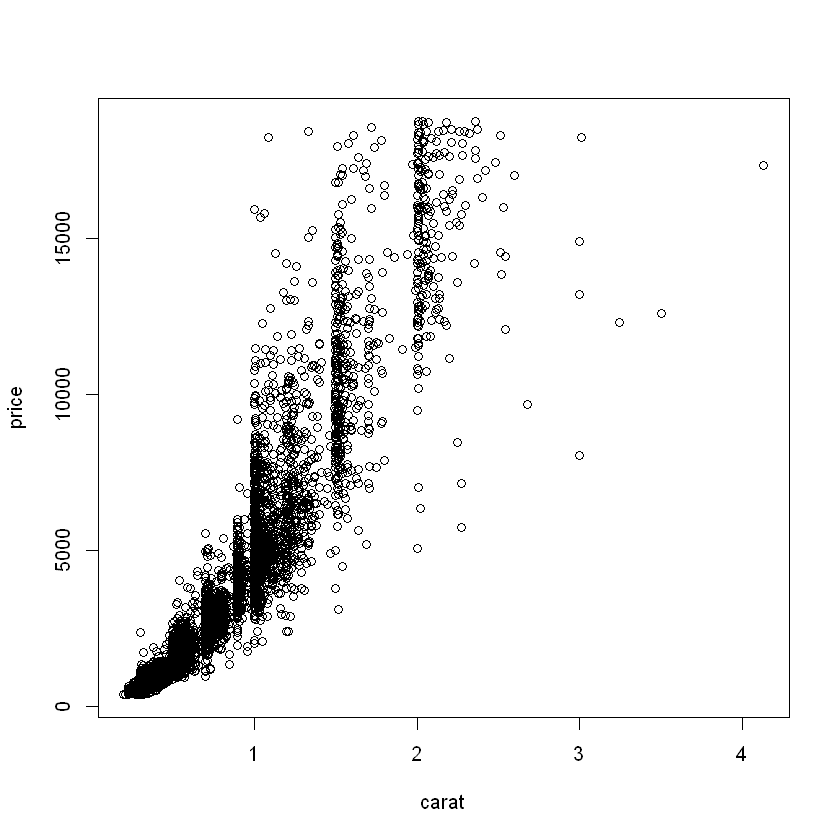

In [4]:
plot(price~carat,data=diamonds2)

Avec **ggplot**, on va faire

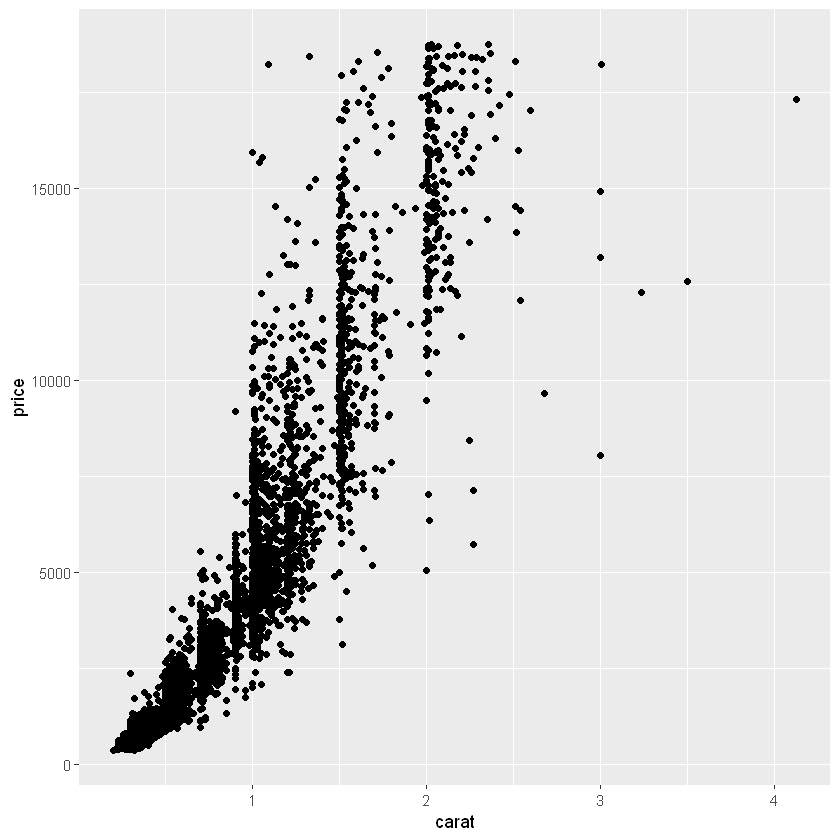

In [6]:
#ggplot(diamonds2) #rien
#ggplot(diamonds2)+aes(x=carat,y=price) #rien
ggplot(diamonds2)+aes(x=carat,y=price)+geom_point() #bon

### Exercice 5

* Tracer l'histogramme de la variable **carat** (utiliser **geom_histogram**).
* Tracer l'histogramme de la variable **carat** avec 10 classes (**help(geom_histogram)**).
* Tracer le diagramme à batons de la variable **cut** (utiliser **geom_bar**).

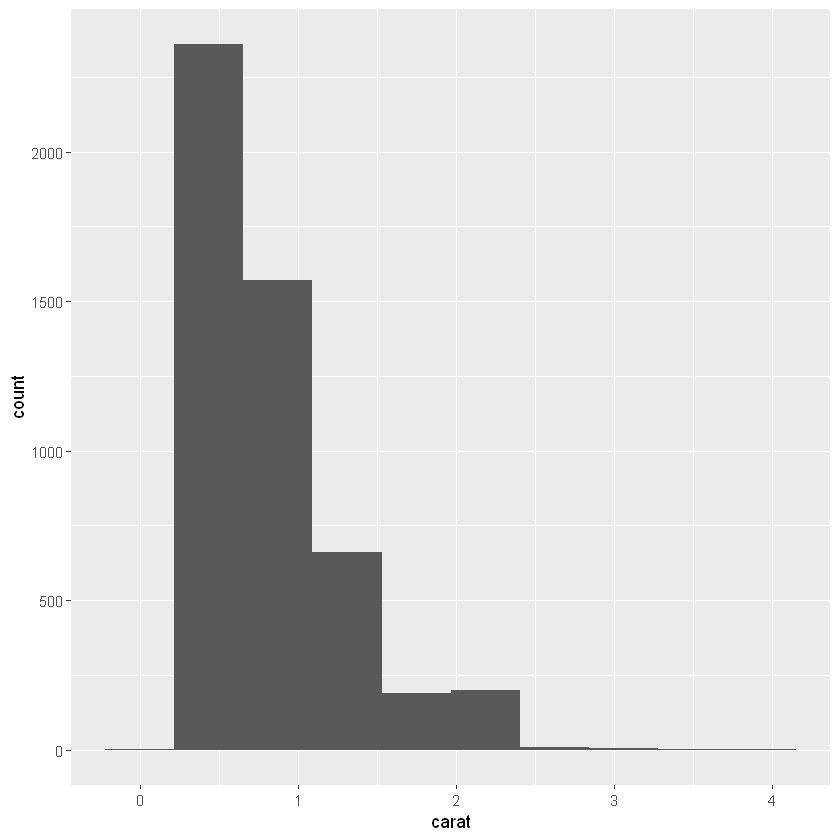

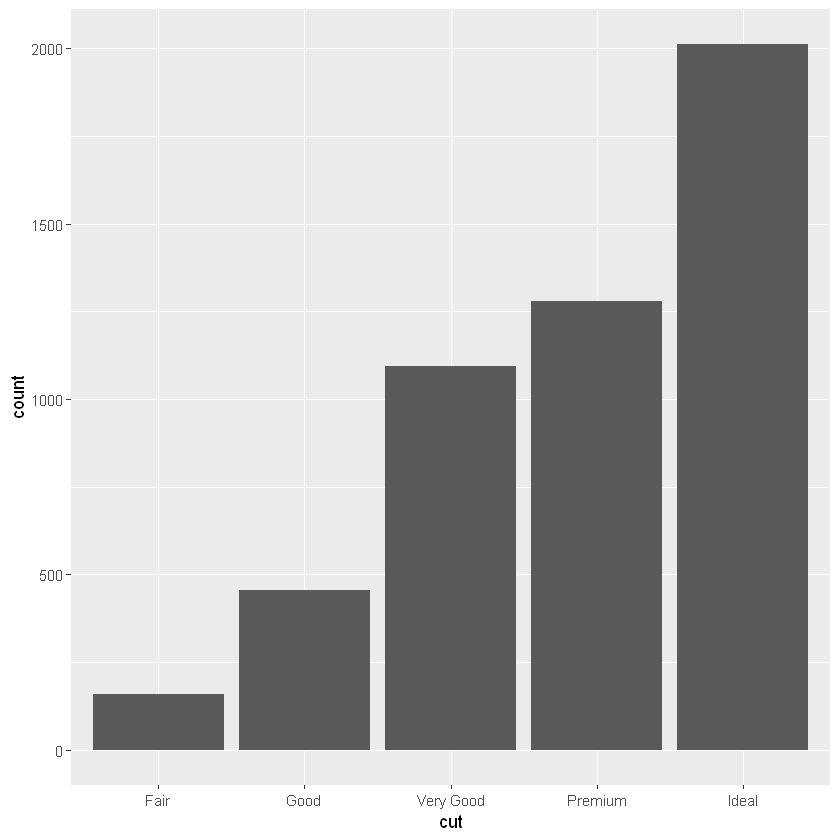

In [11]:
ggplot(diamonds2) + aes(x=carat) + geom_histogram(bins = 10)
ggplot(diamonds2) + aes(x=cut) + geom_bar()

## 2.1 Grammaire ggplot 

La syntaxe **ggplot** se construit à partir d'éléments indépendants qui définissent la grammaire de **ggplot**. Les principaux verbes sont :

  * **Data (ggplot)** : les données au format **dataframe** ou **tibble**
  * **Aesthetics (aes)** : pour sépecifier les variables à représenter dans le graphe.
  * **Geometrics (geom_...)** : le type de graphe.
  * **Statistics (stat_...)** : utile pour spécifier des transformations des données nécessaires pour obtenir le graphe.
  * **Scales (scale_...)** : pour controler les paramètres permettant d'affiner le graphe (changement de couleurs, paramètres des axes...).
Tous ces éléments sont reliés avec le symbole **+**.

### `Data et aesthetics`

Ces deux éléments renseignent les données et les variables à représenter. Par exemple, pour le nuage de points **price vs carat** on fera

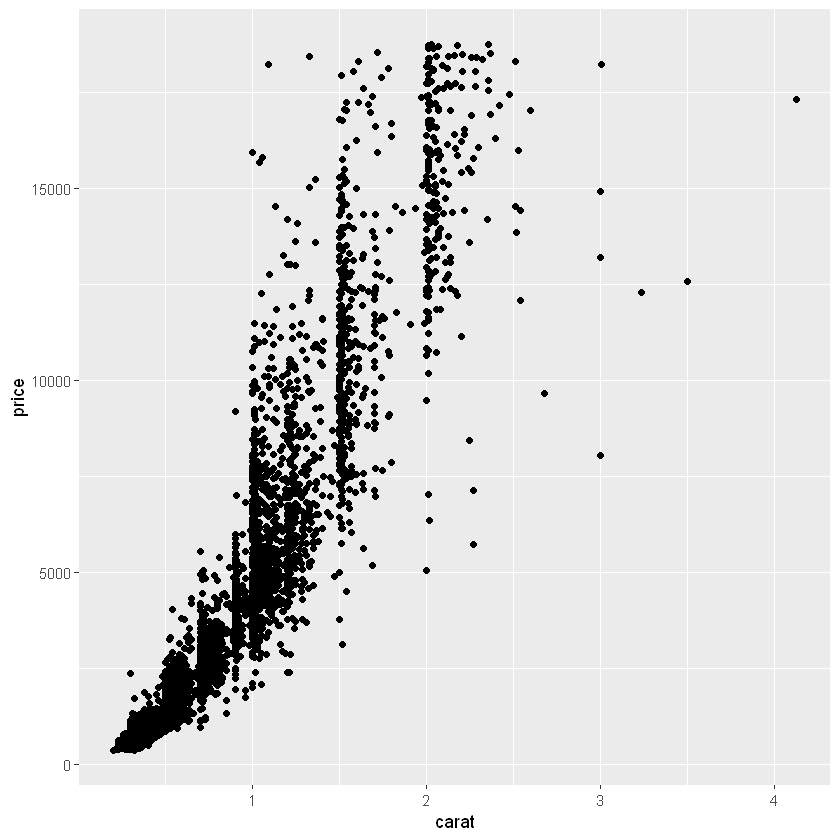

In [14]:
ggplot(diamonds2)+aes(x=carat,y=price)+geom_point()

On peut aussi utiliser les arguments **color**, **size**, **fill** dans la fonction **aes** lorsque des couleurs ou des tailles sont définies par des variables du jeu de données. Par exemple

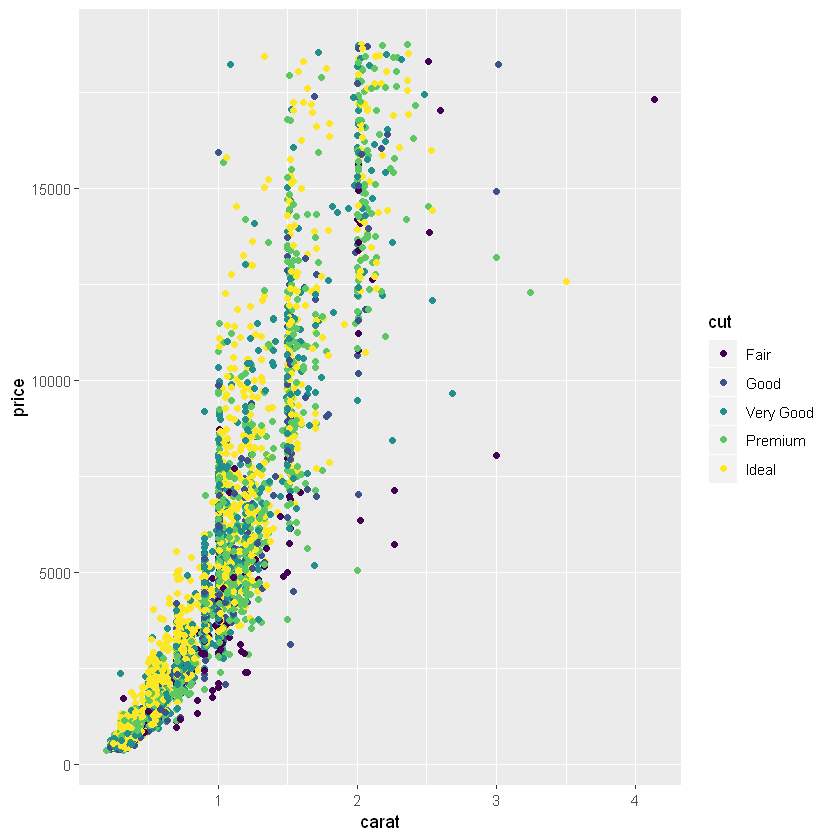

In [19]:
ggplot(diamonds2)+aes(x=carat,y=price,color=cut)+geom_point()

### `Geometrics`

Utile pour décrire le type de représentations. Pour un nuage de points, on utilisera par exemple **geom_point** :

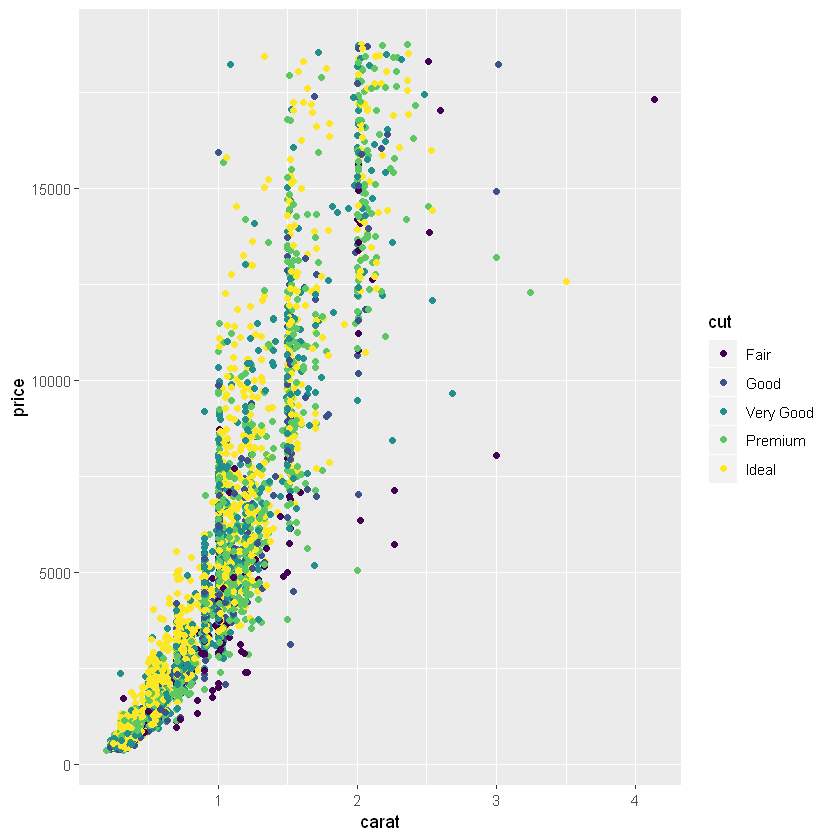

In [16]:
ggplot(diamonds2)+aes(x=carat,y=price,color=cut)+geom_point()

On observe que **ggplot** ajoute la légende automatiquement. Voici quelques exemples de **geometrics** :

Geom   | Description| Aesthetics 
-------|------------|-----------
geom_point()| nuage de points | x, y, shape, fill 
geom_line()|  Ligne (ordonnée selon x) | x, y, linetype
geom_abline()|  Ligne | slope, intercept 
geom_path() | Ligne (ordonnée par l'index) | x, y, linetype 
geom_text() | Texte | x, y, label, hjust, vjust 
geom_rect() | Rectangle | xmin, xmax, ymin, ymax, fill, linetype
geom_polygon() | Polygone | x, y, fill, linetype
geom_segment() | Segment | x, y, fill, linetype 
geom_bar() | Diaggramme en barres | x, fill, linetype, weight 
geom_histogram() | Histogramme | x, fill, linetype, weight 
geom_boxplot() | Boxplot | x, y, fill, weight 
geom_density() | Densité | x, y, fill, linetype 
geom_contour() | Lignes de contour | x, y, fill, linetype 
geom_smooth() | Lisseur (linéaire ou non linéaire) | x, y, fill, linetype 
Tous | | color, size, group

### Exercice 6

* Tracer le diagramme en barres de la variable **cut** (avec des barres bleus).
* Tracer le diagramme en barres de la variable **cut** (avec une couleur pour chaque modalité de **cut**).


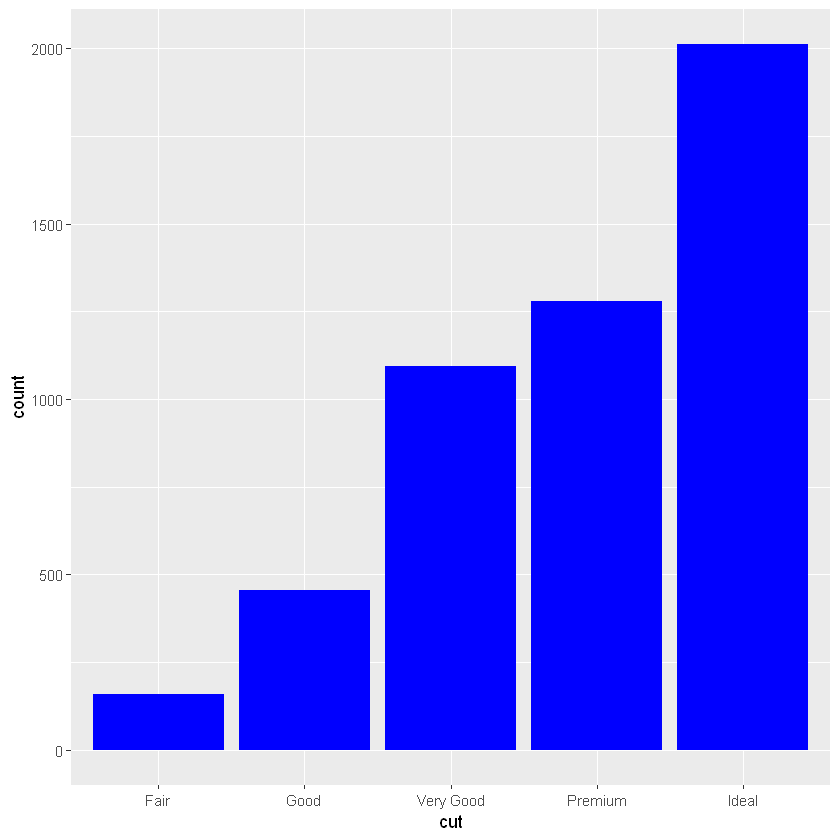

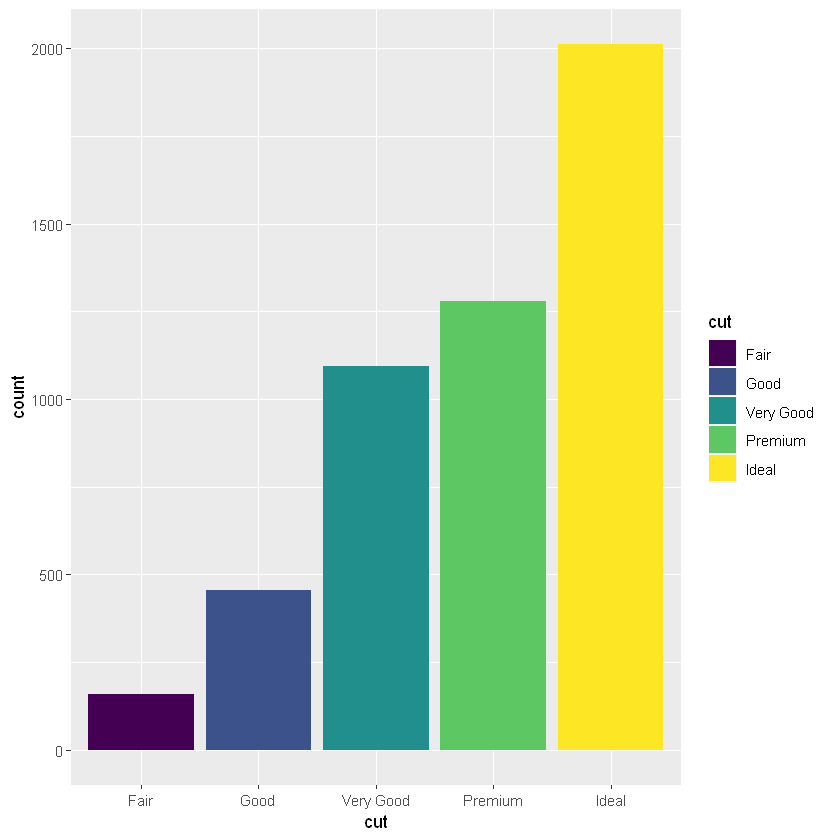

In [21]:
ggplot(diamonds2) + aes(x=cut) + geom_bar(fill = "blue")
ggplot(diamonds2) + aes(x=cut, fill=cut) + geom_bar()

### `Statistics` (partie optionnelle)

Certains graphes nécessitent des calculs d'indicateurs statistiques, comme par exemple le diagamme en barres ou l'histogramme où il faut calculer des hauteurs. Les transformations simples peuvent se faire rapidement, on peut par exemple tracer la fonction **sinus** avec

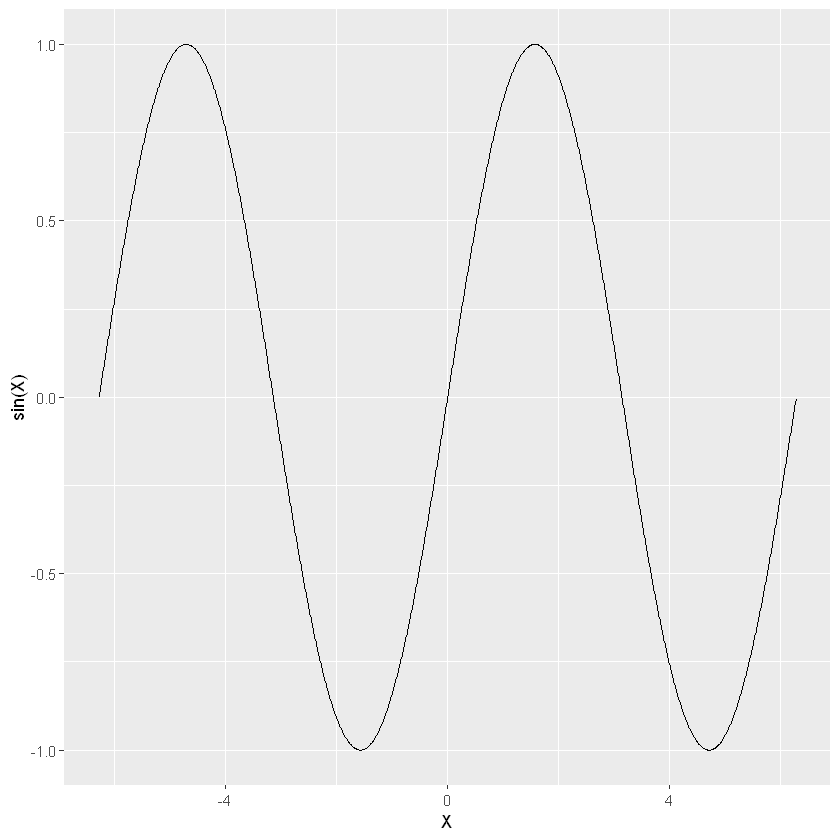

In [22]:
D <- data.frame(X=seq(-2*pi,2*pi,by=0.01))
ggplot(D)+aes(x=X,y=sin(X))+geom_line()

La transformation est précisée dans la fonction **aes**. Pour des transformations plus complexes, nous devons utiliser des **statistics**. Une fonction **stat** permet de définir des nouvelles variables à partir du jeu de données initial, il est ensuite possible de représenter ces nouvelles variables.
Par exemple, la fonction **stat_bin**, qui est utilisée par défaut pour construire des histogrammes, produit les variables suivantes :

* `count`, le nombre d'observations dans chaque classes.
* `density`, la valeur de la densité des observations dans chaque classe (fréquance divisée par largeur de la classe).
* `x`, le centre de la classe.

Par défaut *geom_histogram* représente sur l'axe $y$ le nombre d'observations dans chaque classe (la variable **count**). 

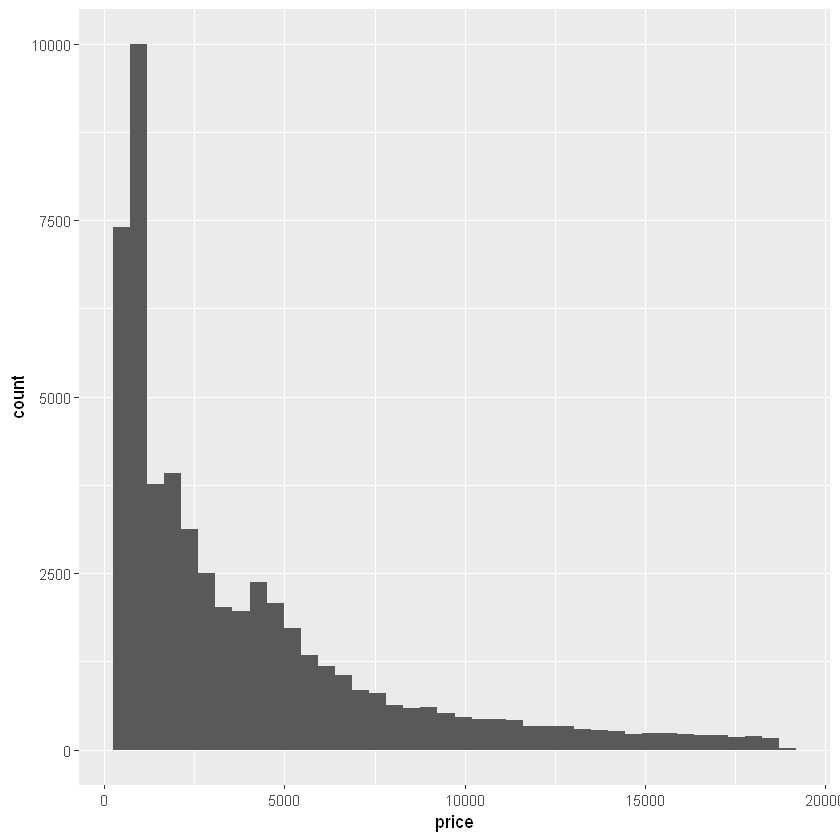

In [23]:
ggplot(diamonds)+aes(x=price)+geom_histogram(bins=40)

Si on souhaite visualiser la densité, il faudra utiliser

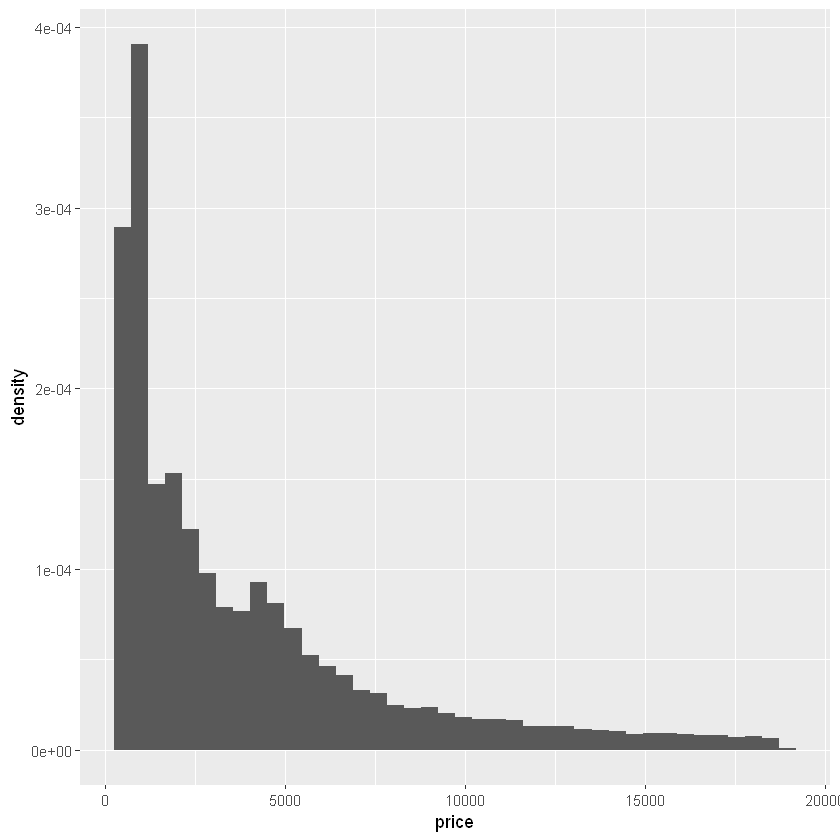

In [24]:
ggplot(diamonds)+aes(x=price,y=..density..)+geom_histogram(bins=40)

Il est possible d'utiliser les fonctions **stat_** à la place des **geom_** pour certaines représentations. Chaque fonction **stat_** possède par défaut un **geom_** et réciproquement. Par exemple,

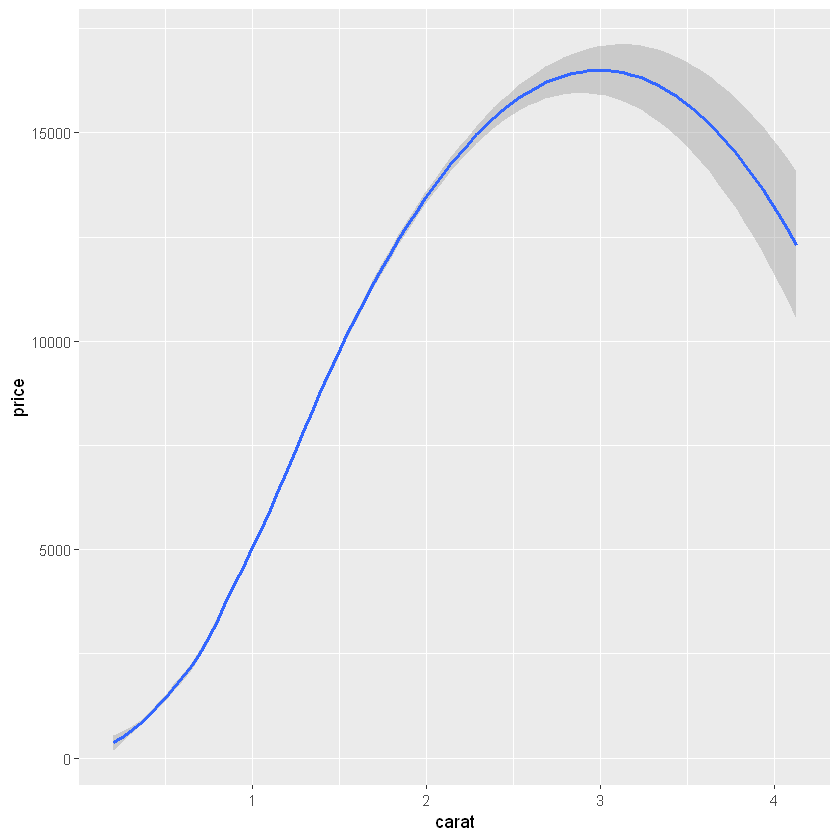

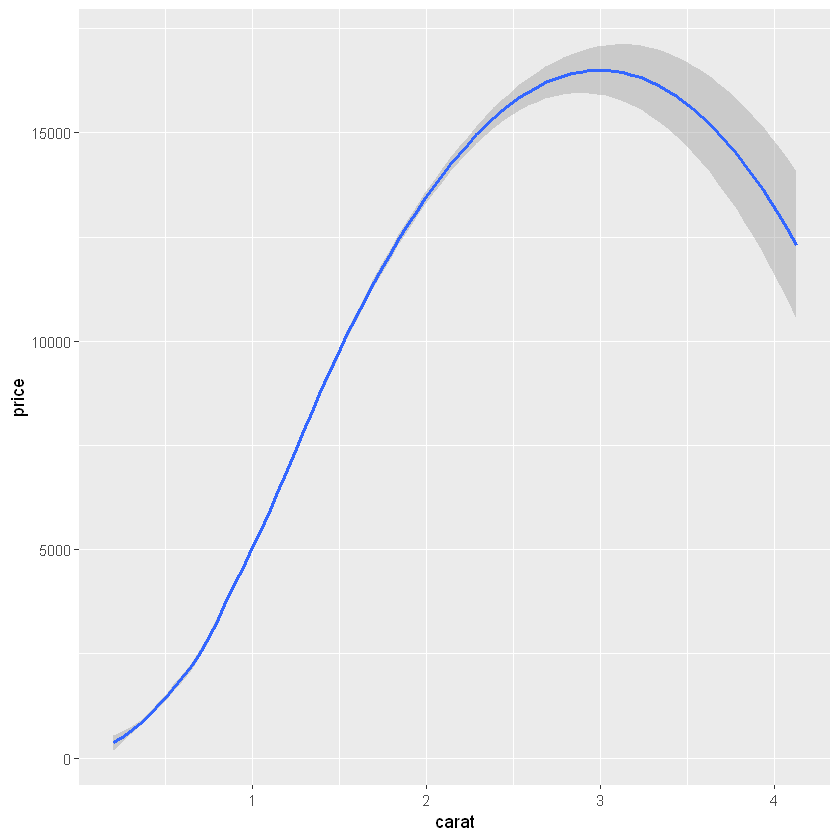

In [25]:
ggplot(diamonds2)+aes(x=carat,y=price)+geom_smooth(method="loess")
ggplot(diamonds2)+aes(x=carat,y=price)+stat_smooth(method="loess")

produisent le même graphe. On peut changer certaines options graphiques dans les fonctions **stat_** en utilisant l'option **geom** :

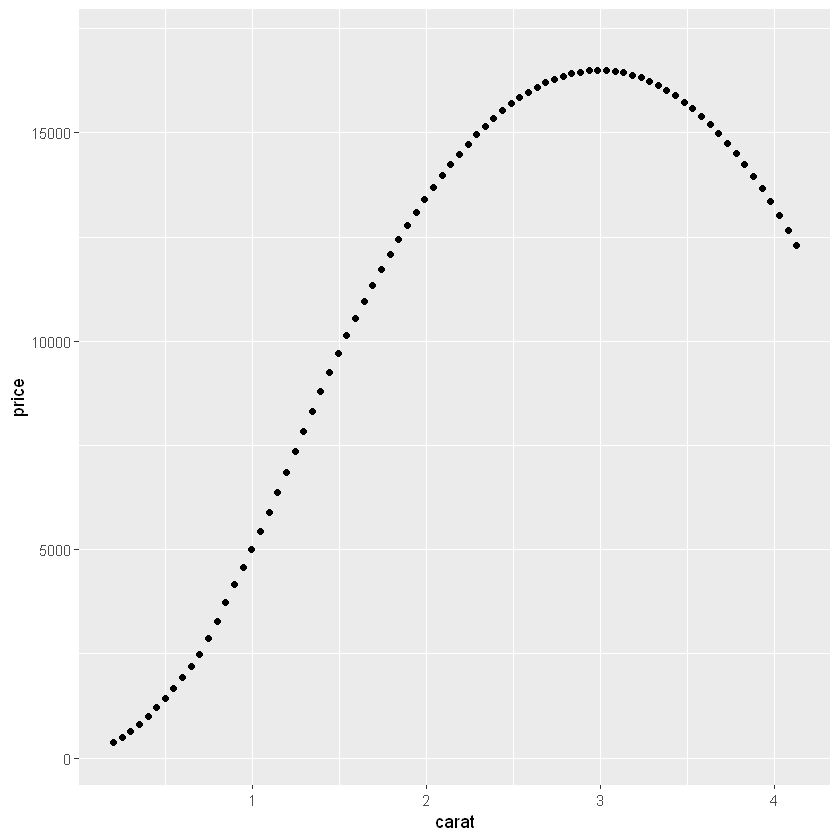

In [26]:
ggplot(diamonds2)+aes(x=carat,y=price)+stat_smooth(method="loess",geom="point")

Voici quelques exemple de fonctions **stat_**

 Stat   |  Description |  Paramètres
--------|------------------|----------------
stat_identity() | aucune transformation |  
stat_bin() | Count | binwidth, origin 
stat_density() | Density | adjust, kernel 
stat_smooth() | Smoother | method, se 
stat_boxplot() | Boxplot | coef 

*stat* et *geom* ne sont pas toujours simples à combiner. Nous recommandons d'utiliser **geom** lorsqu'on débute avec **ggplot**.

### Exercice 7 (optional)

On considère une variable qualitative $X$ dont la loi est donnée par
$$P(X=red)=0.3,\ P(X=blue)=0.2,\ P(X=green)=0.4,\ P(X=black)=0.1$$
Tracer le digramme en barres associé à cette distribution.

In [44]:
D <- data.frame(matrix(c(c("red", 0.3), c("blue", 0.2), c("green", 0.4), c("black", 
    0.1)), nrow = 4, byrow = T))

In [54]:
D

X1,X2
red,0.3
blue,0.2
green,0.4
black,0.1


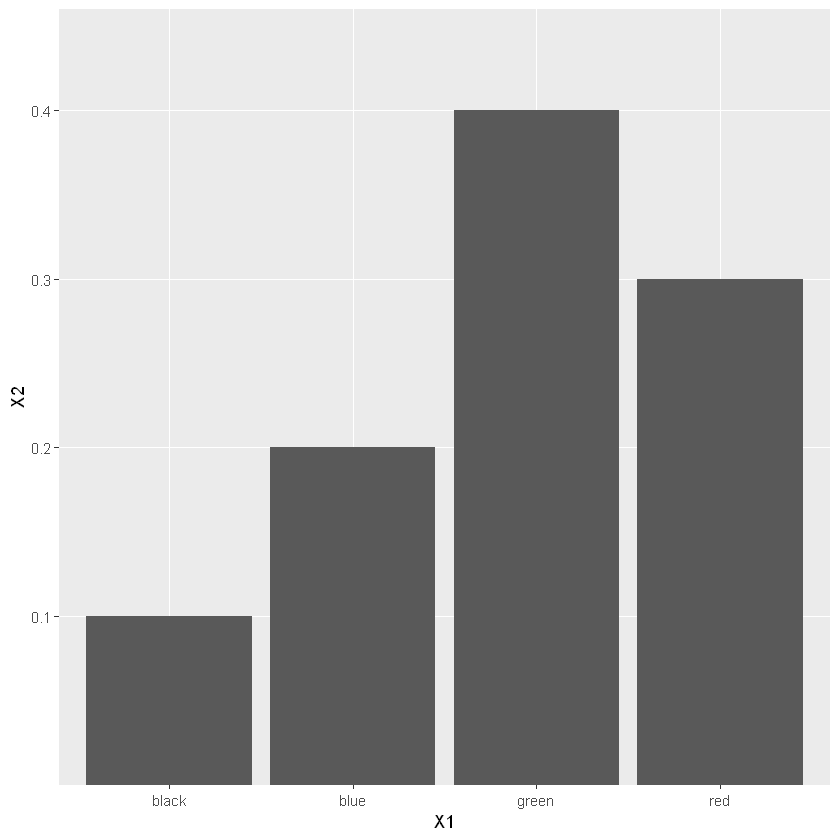

In [67]:
ggplot(D) + aes(x=X1, y=X2) + geom_bar(stat="identity")

### `Scales`

Les échelles (**scales**) controlent certaines options pour les variables utilisées dans **aes** (changement de couleurs, de tailles...). On utilise généralement ce verbe à la dernière étape de construction du graphe. La syntaxe est définie comme suit :

* début **scale_**.
* ajout de l'aesthetics que l'on souhaite modifier (**color**, **fill**, **x_**).
* fin : nom de l'échelle (**manual**, **identity**...)

Par exemple,

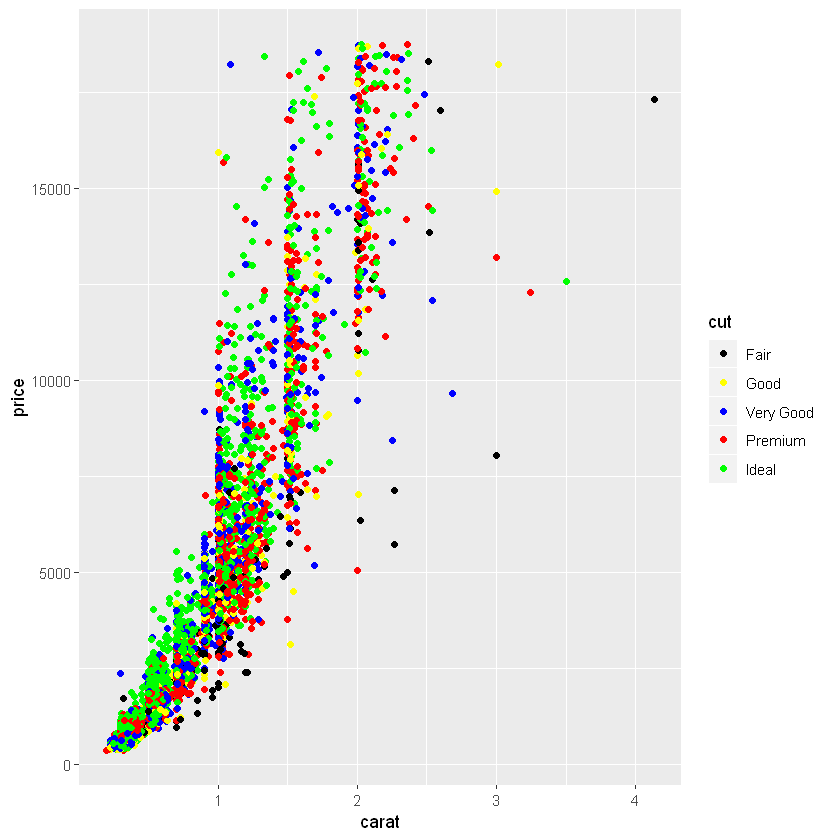

In [27]:
ggplot(diamonds2)+aes(x=carat,y=price,color=cut)+geom_point()+
scale_color_manual(values=c("Fair"="black","Good"="yellow",
"Very Good"="blue","Premium"="red","Ideal"="green"))

Voici quelques exemples des principales échelles :

aes | Discret | Continu
----|-----------|----------
Couleur (color et fill) | brewer | gradient 
  -  | grey | gradient2 
  -  | hue | gradientn 
 - | identity | 
 - | manual |
Position (x et y) | discrete | continous 
- | | date 
Forme | shape | 
- | identity | 
- | manual | 
Taille  | identity | size 
- | manual | 

Nous présentons maintenant quelques exemples :

* `Couleur dans un diagramme en barres`

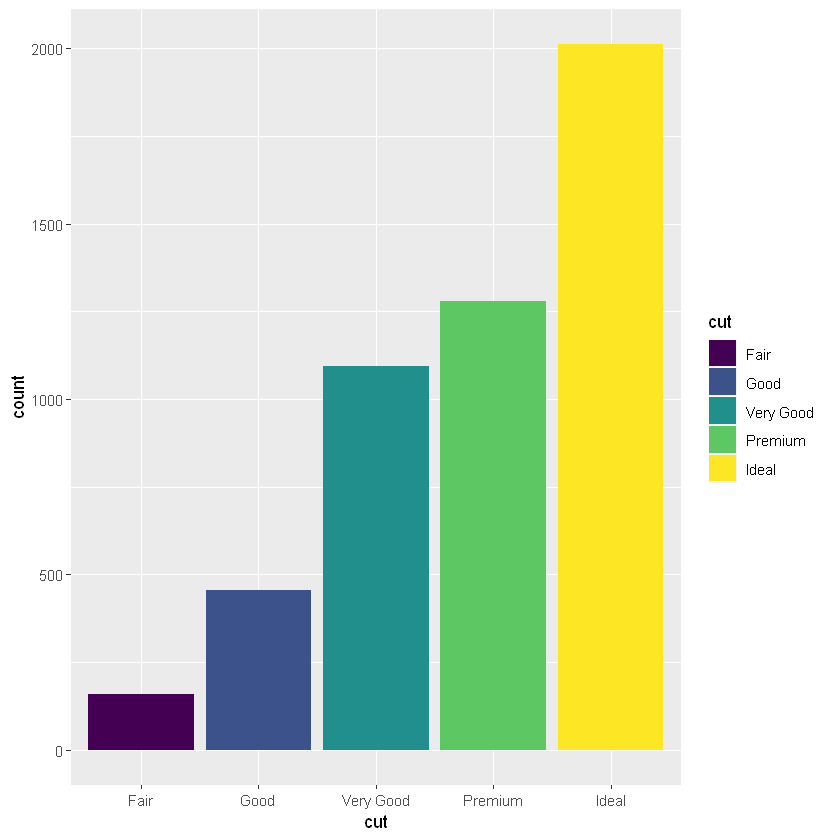

In [63]:
p1 <- ggplot(diamonds2)+aes(x=cut)+geom_bar(aes(fill=cut))
p1

On change la couleur en utilisant la palette **Purples** :

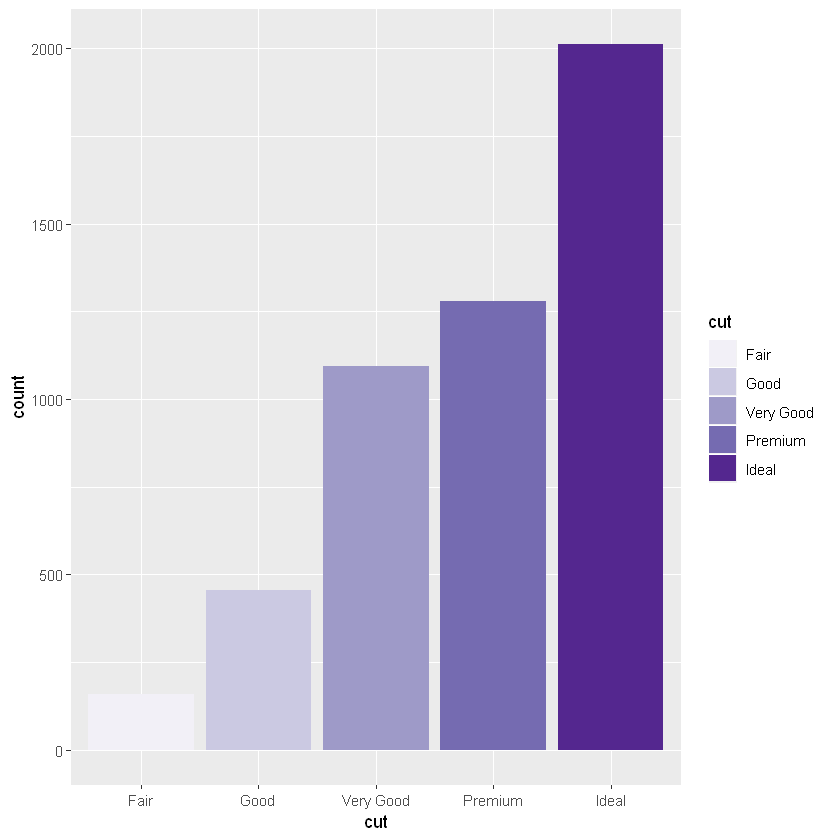

In [64]:
p1+scale_fill_brewer(palette="Purples")

* `Gradient de couleurs pour un nuage de points` :

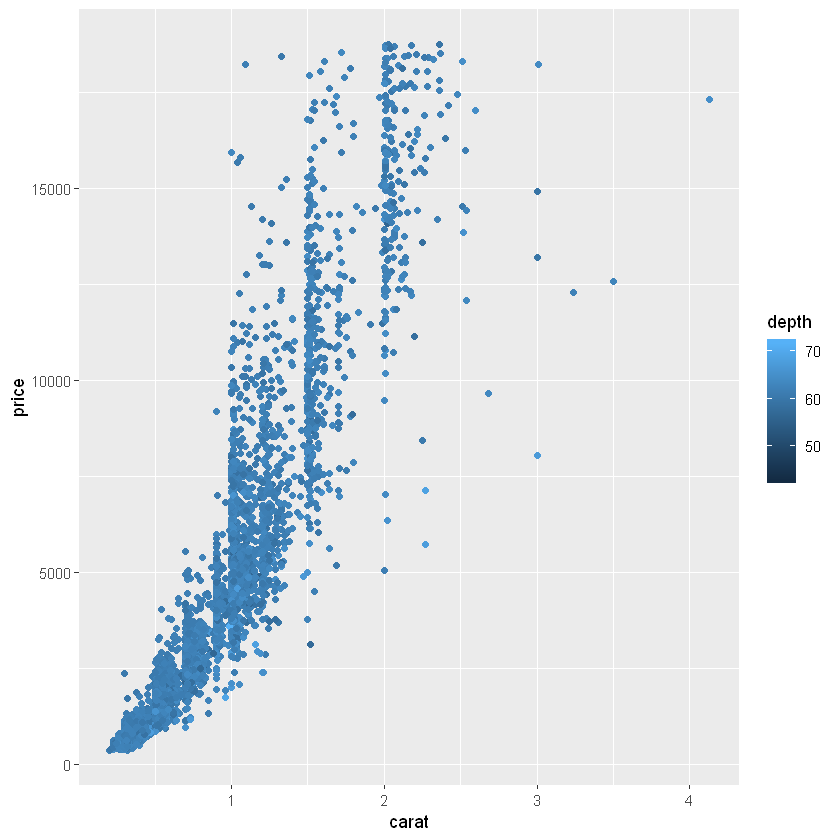

In [65]:
p2 <- ggplot(diamonds2)+aes(x=carat,y=price)+geom_point(aes(color=depth))
p2

On change le gradient de couleur

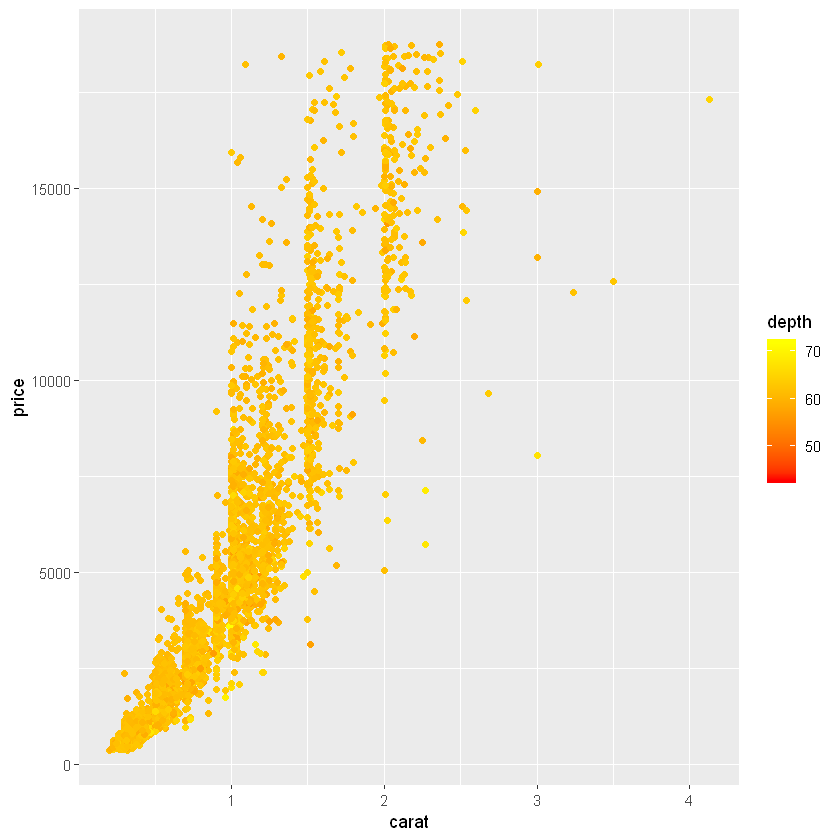

In [68]:
p2+scale_color_gradient(low="red",high="yellow")

*  `Modification sur les axes`

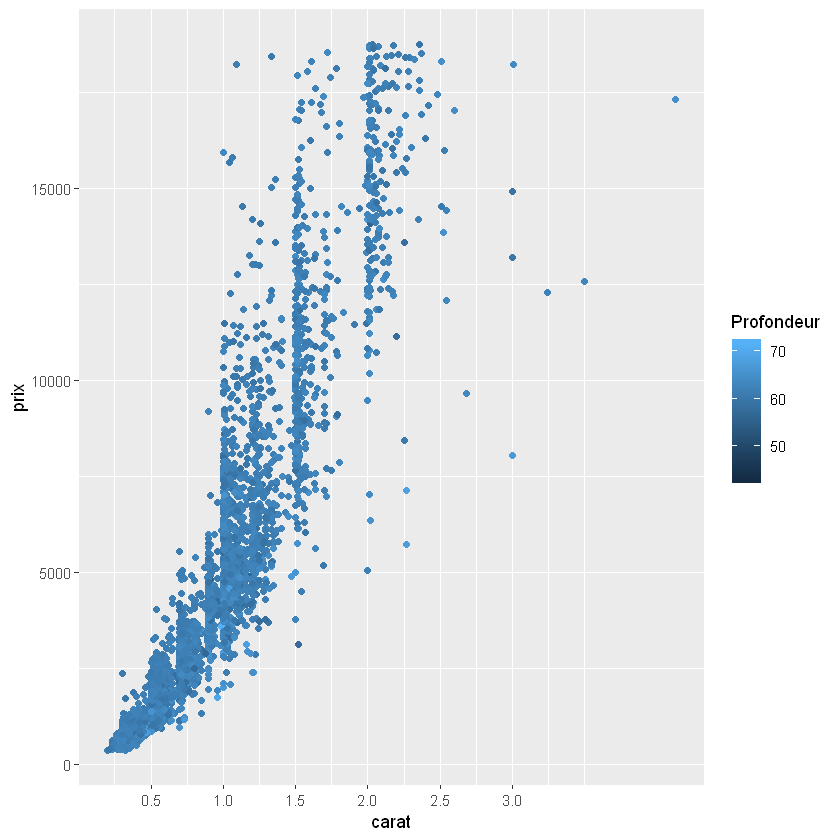

In [69]:
p2+scale_x_continuous(breaks=seq(0.5,3,by=0.5))+scale_y_continuous(name="prix")+scale_color_gradient("Profondeur")

### `Group et facets`

**ggplot** permet de faire des représentations pour des groupes d'individus. Il est possible de procéder de deux façons différentes :

* représenter des sous groupes sur le même graphe, on utilise l'option *group* dans **aes** ;
* représenter des sous groupes sur des graphes différents, on utilise le verbe **facets**.

Représentons ici (sur le même graphe) le lisseur **price vs carat** pour chaque modalité de *cut*  

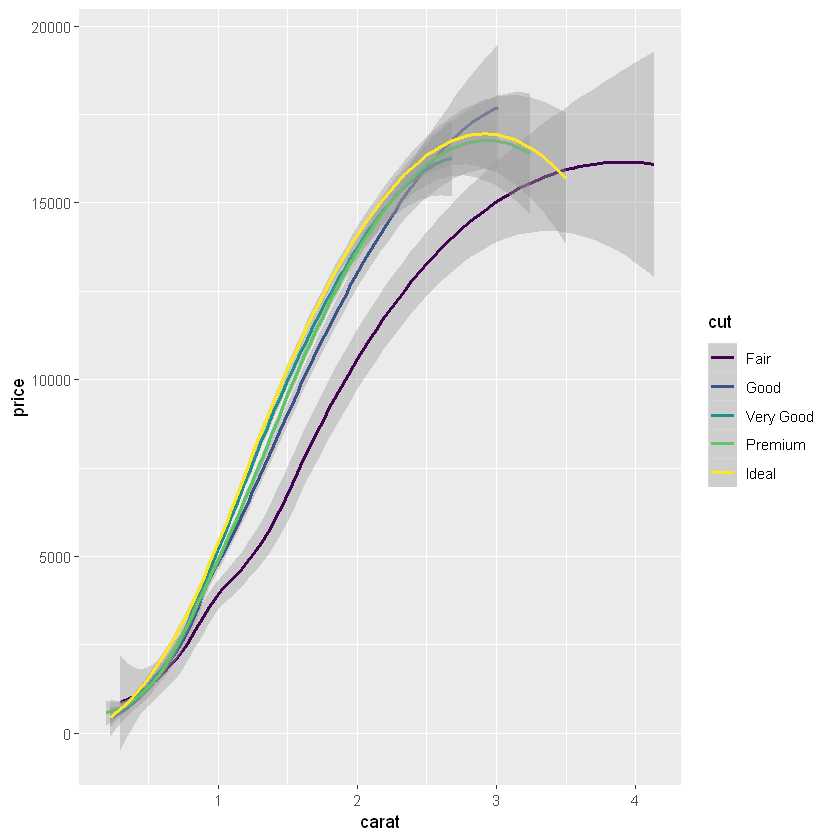

In [70]:
ggplot(diamonds2)+aes(x=carat,y=price,group=cut,color=cut)+geom_smooth(method="loess")

Pour obtenir cette représentation sur plusieurs fenêtres, on utilise

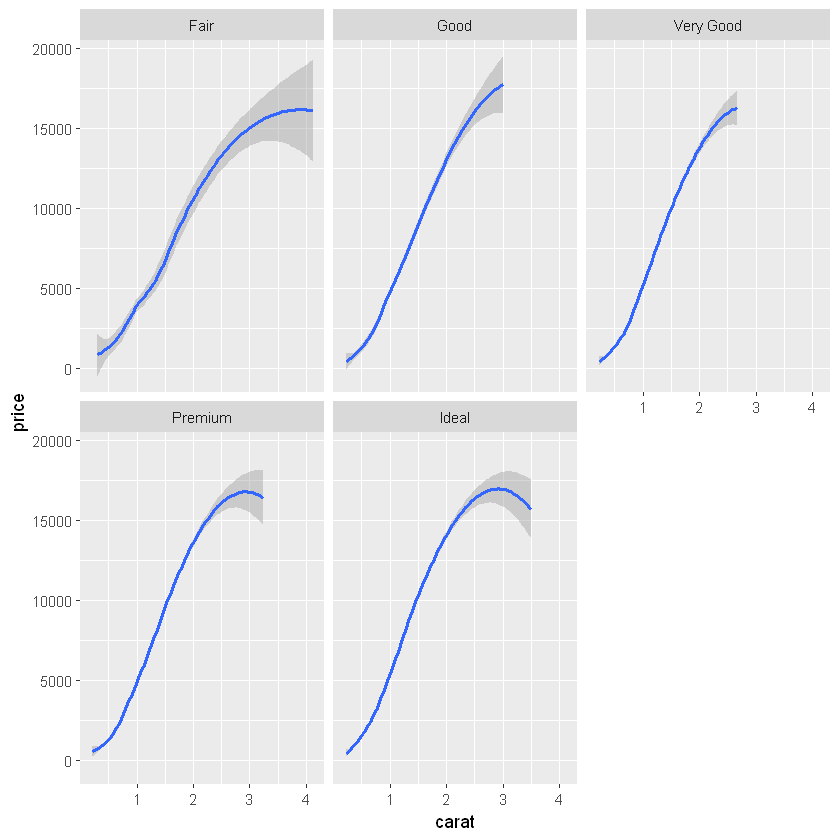

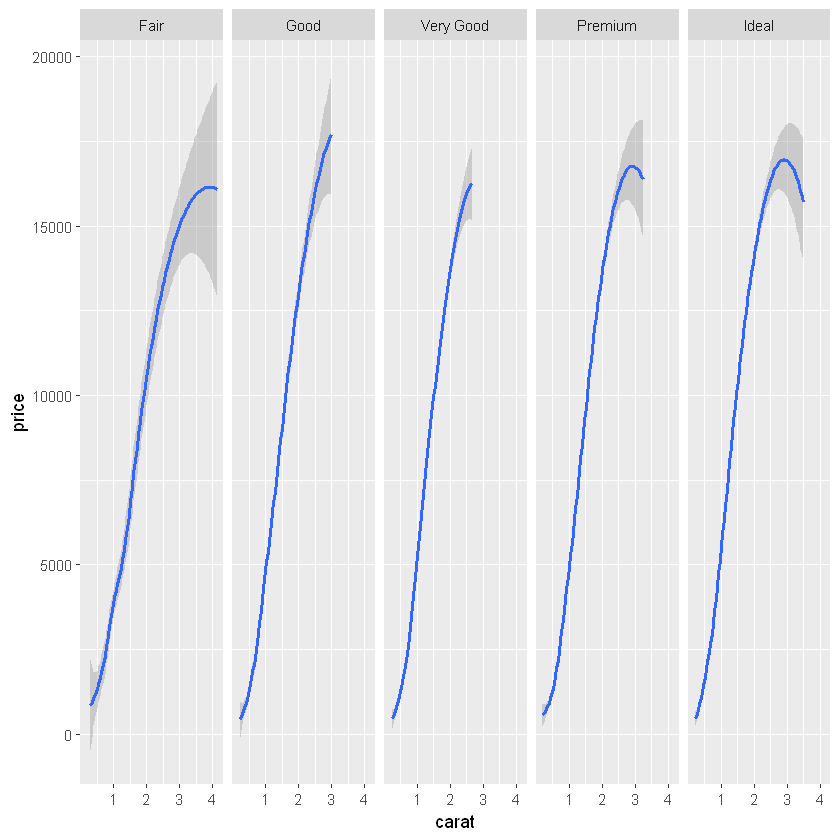

In [71]:
ggplot(diamonds2)+aes(x=carat,y=price)+geom_smooth(method="loess")+facet_wrap(~cut)
ggplot(diamonds2)+aes(x=carat,y=price)+geom_smooth(method="loess")+facet_wrap(~cut,nrow=1)

*facet_grid* et *facet_wrap* font des choses proches mais divisent la fenêtre de façon différente :

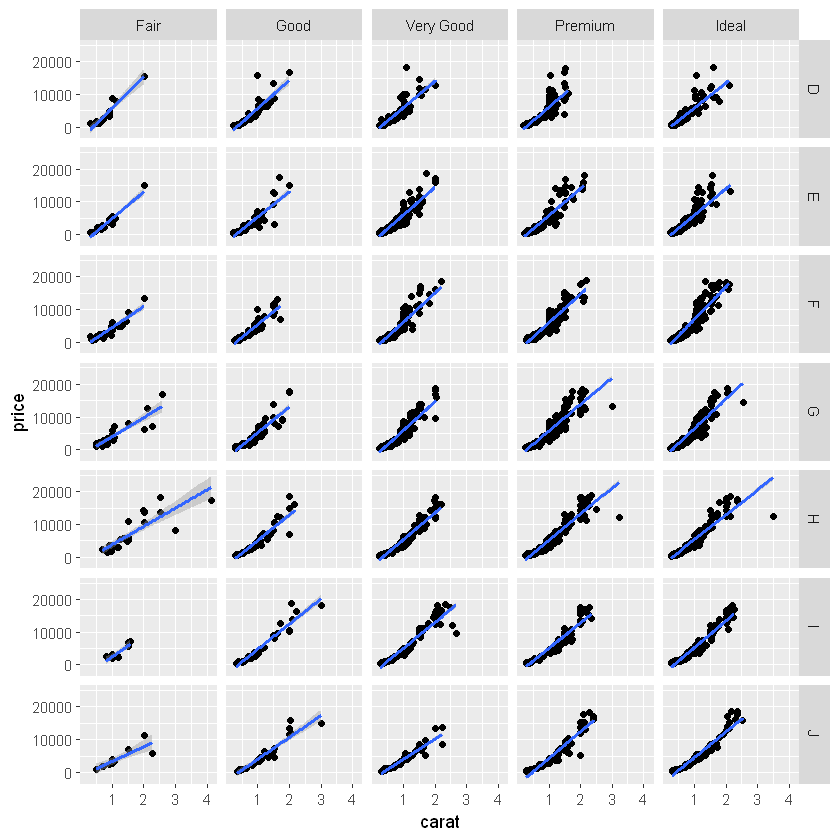

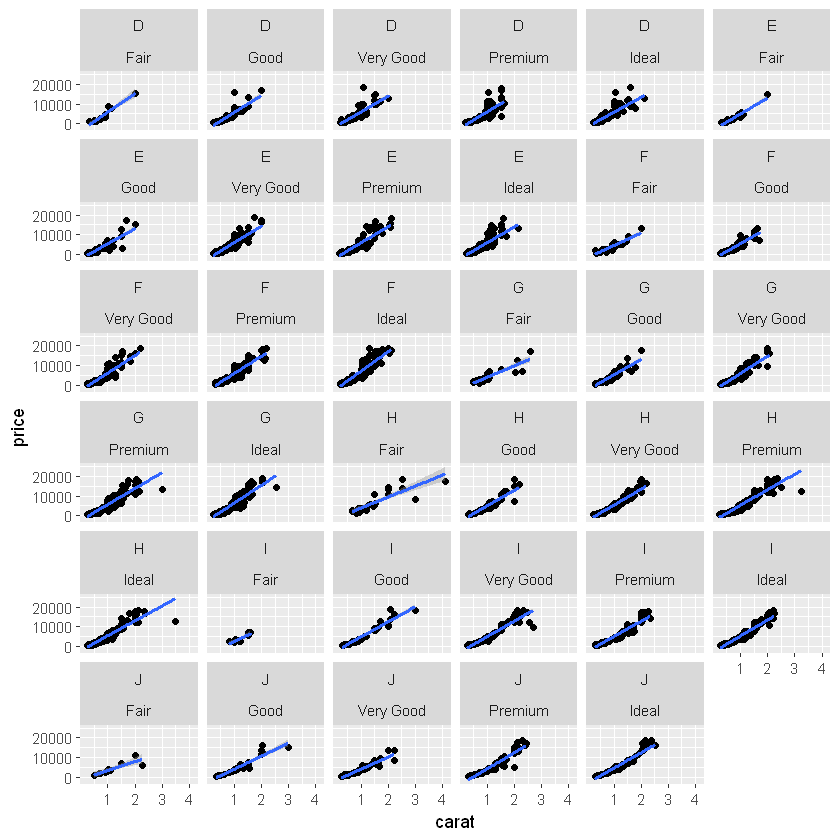

In [72]:
ggplot(diamonds2)+aes(x=carat,y=price)+geom_point()+geom_smooth(method="lm")+facet_grid(color~cut)
ggplot(diamonds2)+aes(x=carat,y=price)+geom_point()+geom_smooth(method="lm")+facet_wrap(color~cut)

## 2.2 Compléments

La syntaxe **ggplot** est définie selon le schéma :

In [ ]:
ggplot()+aes()+geom_()+scale_()

Elle est très flexible, on peut par exemple spécifier les **aes** dans les verbes **ggplot** ou **geom_** :

In [ ]:
ggplot(diamonds2)+aes(x=carat,y=price)+geom_point()
ggplot(diamonds2,aes(x=carat,y=price))+geom_point()
ggplot(diamonds2)+geom_point(aes(x=carat,y=price))

Ceci peut se révéler très utile lorsqu'on utilise des **aes** différents dans les **geom_**.

On peut aussi construire un graphe à l'aide de différents jeux de données :

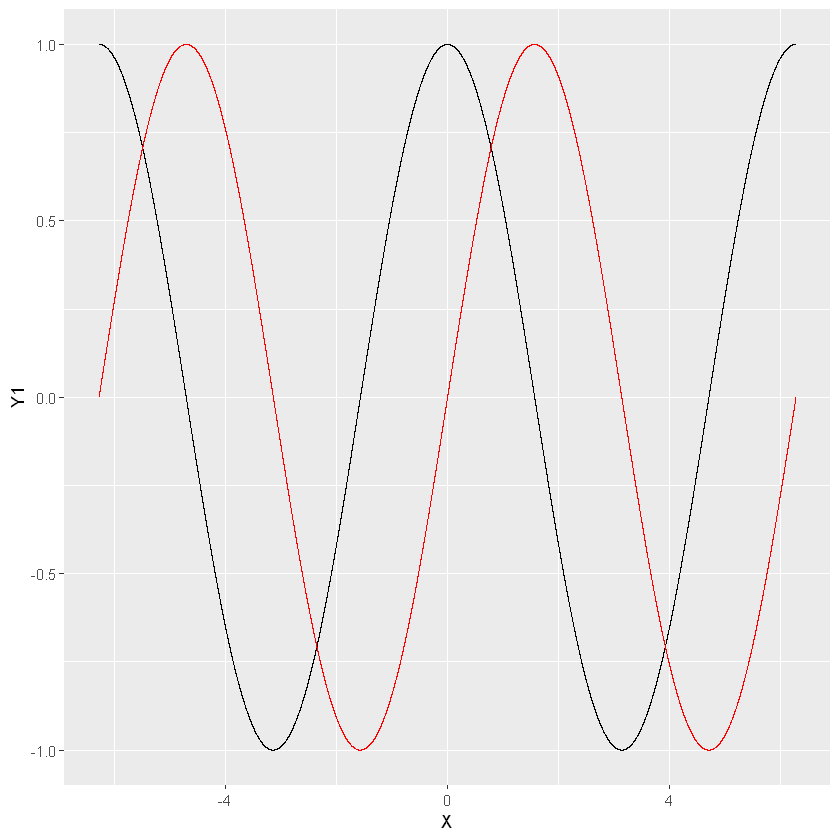

In [73]:
X <- seq(-2*pi,2*pi,by=0.001)
Y1 <- cos(X)
Y2 <- sin(X)
donnees1 <- data.frame(X,Y1)
donnees2 <- data.frame(X,Y2)
ggplot(donnees1)+geom_line(aes(x=X,y=Y1))+
geom_line(data=donnees2,aes(x=X,y=Y2),color="red")

Il existe d'autres fonctions **ggplot** :

* **ggtitle** pour ajouter un titre.
* **ggsave** pour sauver un graphe.
* **theme_** pour changer le thème du graphe.

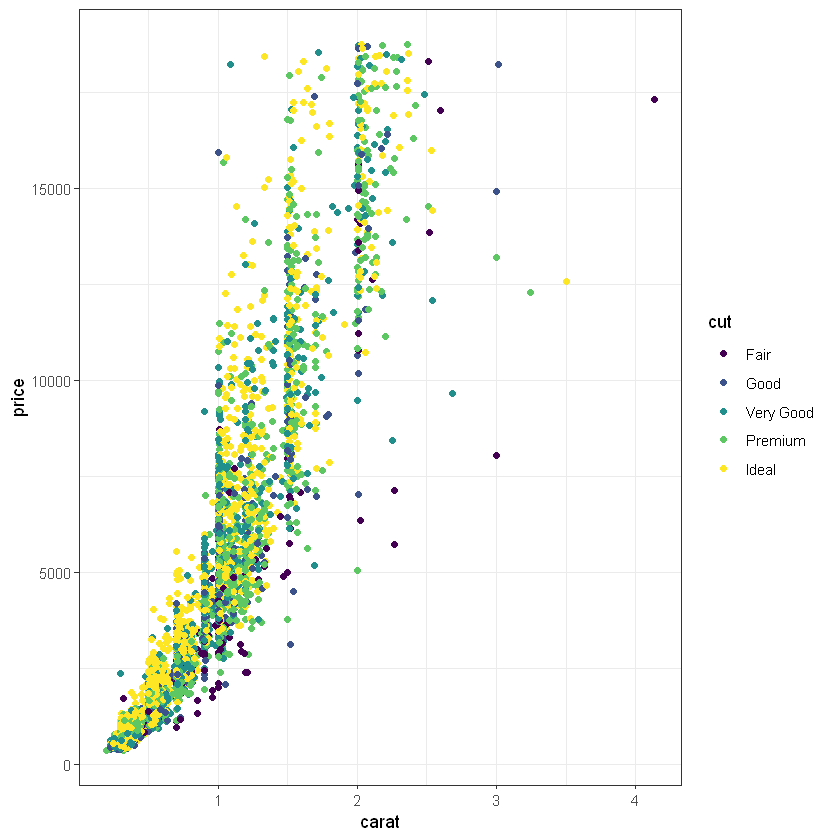

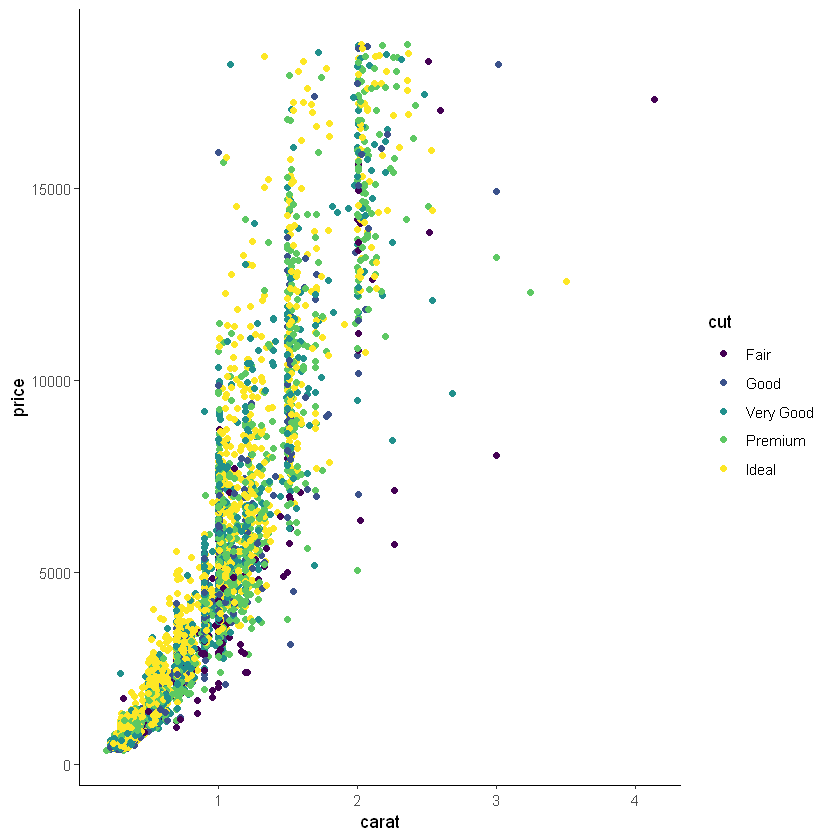

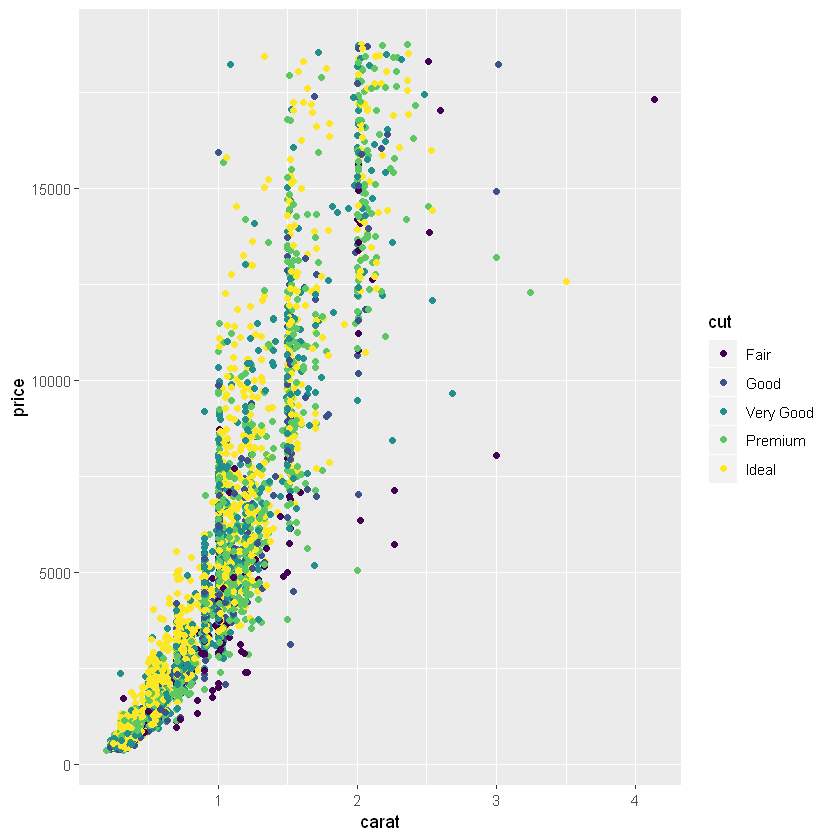

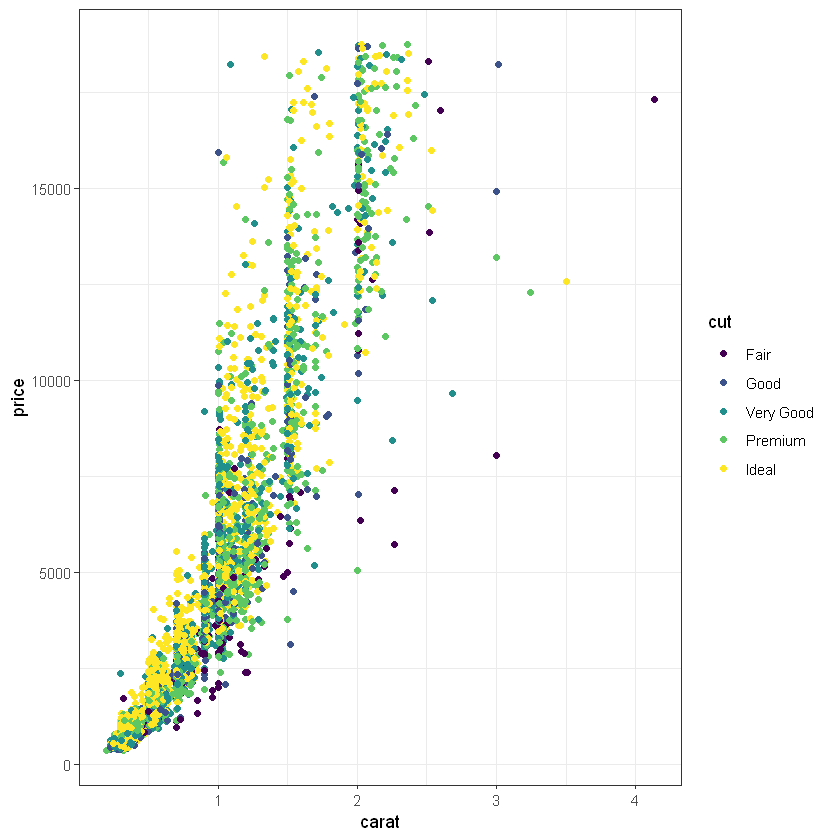

In [74]:
p <- ggplot(diamonds2)+aes(x=carat,y=price,color=cut)+geom_point()
p+theme_bw()
p+theme_classic()
p+theme_grey()
p+theme_bw()

### Exercice 8

1. Tracer les fonctions sinus et cosinus. On utilisera tout d'abord deux jeux de données : un pour le sinus, l'autre pour le cosinus.

In [76]:
X <- seq(-2*pi,2*pi,by=0.001)
sinus <- data.frame(X, sin(X))
cosinus <- data.frame(X, cos(X))

X,sin.X.
-6.283185,2.449213e-16
-6.282185,9.999998e-04
-6.281185,1.999999e-03
-6.280185,2.999996e-03
-6.279185,3.999989e-03
-6.278185,4.999979e-03
-6.277185,5.999964e-03
-6.276185,6.999943e-03
-6.275185,7.999915e-03
-6.274185,8.999879e-03


2. Faire la même chose avec un jeu de données et deux appels à la fonction **geom_line**.

3. Faire la même chose avec un jeu de données et un seul appel à **geom_line**. On pourra utiliser la fonction **gather** du **tidyverse**.

4. Tracer les deux fonctions sur deux fenêtres graphiques (utiliser **facet_wrap**).

5. Faire la même chose avec **grid.arrange** du package **gridExtra**.

### Exercice 9

On considère les données **mtcars**

In [ ]:
data(mtcars)
summary(mtcars)

1. Tracer l'histograme de **mpg** (on fera varier le nombre de classes).

2.Tracer l'histogramme de la densité.

3. Tracer le diagramme en barres de  **cyl**.

4. Tracer le nuage de points **disp vs mpg** en utilisant une couleur différente pour chaque valeur de **cyl**.

5. Ajouter le lisseur linéaire sur le graphe.

### Exercice 10

1. Générer un échantillon $(x_i,y_i),i=1,\dots,100$ selon le modèle linéaire
$$Y_i=3+X_i+\varepsilon_i$$
où $X_i$ sont i.i.d. de loi uniforme sur $[0,1]$ et $\varepsilon_i$ sont i.i.d. de loi gaussienne $N(0,0.2^2)$ (utiliser **runif** et **rnorm**).

2. Tracer le nuage de points **Y vs X** et ajouter le lisseur linéaire.

3. Représenter les résidus : on ajoutera une ligne verticale entre chaque point et la droite de lissage (utiliser **geom_segment**).



### Challenge (option)

On considère les données **diamonds**.

1. Tracer les graphes suivants (utiliser **coord_flip** pour le second).

![](challenge1.pdf)
![](challenge2.pdf)
![](challenge3.pdf)

2. Ajouter sur le troisième graphe les quartiles de la variable **carat** pour chaque valeur de **cut**. On utilisera une ligne verticale.

3. En déduire le graphe suivant (on utilisera le package **ggstance**).

![](challenge4.pdf)


### Exercice 11

On considère les données tennis sur les tournois du grand chelem disponibles ici [https://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics](https://archive.ics.uci.edu/ml/datasets/Tennis+Major+Tournament+Match+Statistics).

In [ ]:
FrenchOpen_men_2013 <- read_csv("FrenchOpen-men-2013.csv")
RG2013 <- FrenchOpen_men_2013
WIMB2013 <- read_csv("Wimbledon-men-2013.csv")
RG_WIMB2013 <- bind_rows("RG"=RG2013,"WIMB"=WIMB2013,.id="Tournament")

1. Tracer deux histogrammes (un pour Roland Garros, l'autre pour wimbledon) pour visualiser la distribution du nombre d'aces par match.

2. Comparer les nombres d'aces par match entre Roland Garros et Wimbledon à l'aide d'un boxplot.

3. Comparer les nombres de points joués au filet (**NPA.1+NPA.2**) par match entre Roland Garros and Wimbledon avec un boxplot.

4. Pour le tournoi de Roland Garros, étudier à l'aide d'un boxplot l'influence du premier service sur le résultat du match.

5. faire la même chose pour Wimbledon.

6. Comparer les pourcentages de premier service des vainqueurs de match entre les tournois de Rolang Garros et Wimbledon.
